# Problem Statement
Data Link : 
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset

## About Dataset

## Dataset Information
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

## Attribute Information
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit. NT dollars = New Taiwan dollars)
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no). TARGET VARIABLE.


# Project Objective

## Background Goal :
The data is from a Taiwanese bank. The bank wants to reduce the risk in its credit card business by limiting the number of defaulters. The bill amount, payment details and demographic information of various customers is provided for a period of six months, April to September 2005. Also, their default status is mentioned at the end of September. 

Our objective is to build a predictive model to predict whether a customer will default their payment next month or not, from their behavious patterns provided here.

## Business impact
The model will help the bank to identify potential defaulters from their behaviour pattern. This will provide meaningful business insight into risk management and decision making in regards to payment recovery, and portfolio management. It will futher help in estimating the volume of revenue, profits, non-performing assets, expenses etc. Being able to have a foresight of these paramters will aid in better decision making and increase overall profitability of the business.

# Exploratory Data Analysis and Validation


In [93]:
# reading the csv data file from Github repository

import pandas as pd
credit_data = pd.read_csv("https://raw.githubusercontent.com/A-Bhanupratap/ML_data_files/main/Project%201D_dataset/UCI_Credit_Card.csv")
print(credit_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [94]:
# renaming target variable to DEFAULT
credit_data.rename(columns = {'default.payment.next.month':'DEFAULT'}, inplace=True)

# checking shape ans records of the dataset
print(credit_data.shape)
credit_data.sample(20)

(30000, 25)


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
7349,7350,80000.0,1,2,2,41,2,0,0,0,...,49233.0,48737.0,48280.0,3253.0,3211.0,1691.0,1721.0,1800.0,1576.0,1
25998,25999,50000.0,2,3,2,30,0,0,0,0,...,5520.0,5204.0,4703.0,5261.0,1132.0,2138.0,172.0,200.0,168.0,0
29036,29037,230000.0,2,1,1,49,-2,-2,-2,-2,...,1796.0,3970.0,7214.0,299.0,8997.0,1808.0,3970.0,7214.0,3684.0,0
7641,7642,210000.0,1,2,2,27,0,0,0,0,...,27644.0,26236.0,26312.0,1606.0,2000.0,1200.0,1200.0,1000.0,1000.0,0
9526,9527,320000.0,2,1,2,28,-1,-1,-2,-1,...,13312.0,-5.0,-5.0,1135.0,1952.0,13375.0,5.0,0.0,0.0,0
6042,6043,100000.0,2,1,2,32,0,0,0,0,...,68668.0,66845.0,67452.0,3800.0,4000.0,2500.0,2500.0,3000.0,2600.0,0
9619,9620,310000.0,1,1,2,37,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4341,4342,50000.0,1,2,1,32,0,0,0,0,...,17459.0,17825.0,18193.0,1998.0,3000.0,625.0,647.0,664.0,649.0,0
23119,23120,80000.0,2,5,1,30,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
10001,10002,50000.0,2,2,2,28,-1,-1,-1,-1,...,390.0,885.0,885.0,0.0,390.0,390.0,885.0,885.0,885.0,0


## Findings
* Dataset contains 24 independent variables and 1 dependent (target) variable
* There are 30000 observations
* All the variables are already encoded into numeric format
* There are no null values in any of the variables

## Categorical variable exploration
Numeric categorical variables

### 1. SEX
Gender of client (1=male, 2=female)

2    18112
1    11888
Name: SEX, dtype: int64


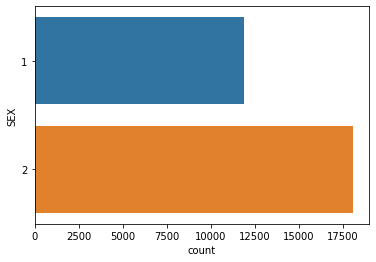

In [95]:
# Using frequency table to analyze discrete variable

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print(credit_data["SEX"].value_counts())
sns.countplot(y= "SEX", data = credit_data)

# FINDINGS : Data is fine. No cleaning required

### 2. EDUCATION
Highest level of degree obtained
(1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


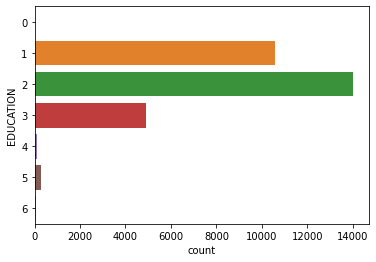

In [96]:
print(credit_data["EDUCATION"].value_counts())
sns.countplot(y= "EDUCATION", data = credit_data)

In [97]:
# FINDINGS
# 0 should not be present. But 14 records are present
# 5 and 6 = unknown should be cleaned. 280 and 51 records respectively

# Total records for 0, 5, 6 = 14+280+51 = 345
# Percentage  = 1.15%

# Action : Impute based on target for these 345 records

### 3. MARRIAGE
Marital status (1=married, 2=single, 3=others)

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


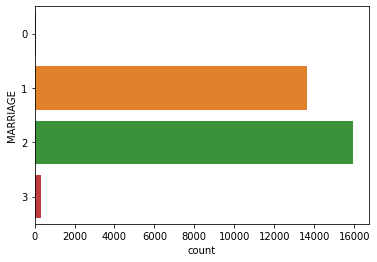

In [98]:
print(credit_data["MARRIAGE"].value_counts())
sns.countplot(y= "MARRIAGE", data = credit_data)

In [99]:
# FINDINGS : 54 records of category 0. Less than 1%
# Actions : impute based on target

### 4. PAY_0
Repayment status in September, 2005 

(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
Range should be integer values from -1 to 8.

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64


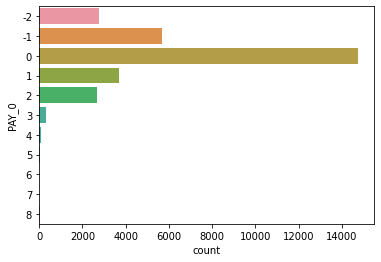

In [100]:
print(credit_data["PAY_0"].value_counts())
sns.countplot(y= "PAY_0", data = credit_data)

In [101]:
# FINDINGS : Seeing the frequency of 0, we can infer that 0 would mean that the payment was made on time without being delinquent.
# Most probably, 0 is the status of customers who paid within one month of bill generation, without being delinquent. Paid late but not delinquent.
# So -1 would mean customers who paid either before vill generation, or within the grace period after bill generation.
# Similar pattern of status 0 and -1 is also seen in other variables like PAY_2, PAY_3 etc.

# Data is clean. No action required.

### 5. PAY_2
Repayment status in August, 2005 (scale same as PAY_0)

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64


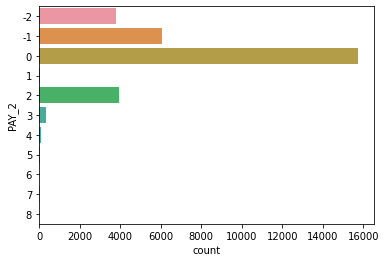

In [102]:
print(credit_data["PAY_2"].value_counts())
sns.countplot(y= "PAY_2", data = credit_data)

In [103]:
# FINDINGS : -2 status is not defined in documentation but it seems like a valid category. 
# Two reasons: 1. percentage of data is more than 10%
#              2. -2 status is present in other PAY_ variables also ib similar proportion.

# Data is clean

### 6. PAY_3
Repayment status in July, 2005 (scale same as PAY_0)

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64


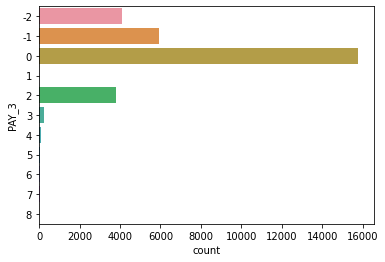

In [104]:
print(credit_data["PAY_3"].value_counts())
sns.countplot(y= "PAY_3", data = credit_data)

# Data is clean

### 7. PAY_4
Repayment status in June, 2005 (scale same as PAY_0)

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 1        2
 8        2
Name: PAY_4, dtype: int64


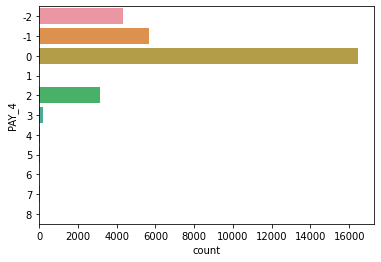

In [105]:
print(credit_data["PAY_4"].value_counts())
sns.countplot(y= "PAY_4", data = credit_data)

# Data is clean

### 8. PAY_5
Repayment status in May, 2005 (scale same as PAY_0)

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64


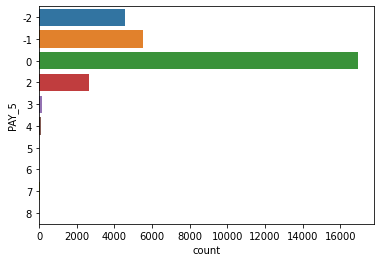

In [106]:
print(credit_data["PAY_5"].value_counts())
sns.countplot(y= "PAY_5", data = credit_data)

# Data is clean

### 9. PAY_6
Repayment status in April, 2005 (scale same as PAY_0)

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64


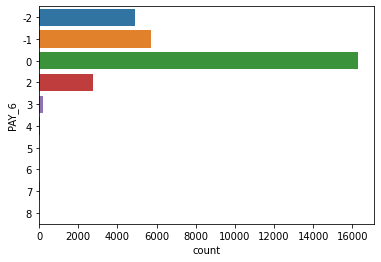

In [107]:
print(credit_data["PAY_6"].value_counts())
sns.countplot(y= "PAY_6", data = credit_data)

# Data is clean

### 10. DEFAULT (Target variable)
Default payment (1=yes, 0=no)

0    23364
1     6636
Name: DEFAULT, dtype: int64


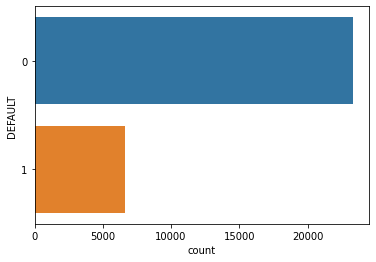

In [108]:
print(credit_data["DEFAULT"].value_counts())
sns.countplot(y= "DEFAULT", data = credit_data)

# Data is clean

In [109]:
def_cnt = credit_data["DEFAULT"].value_counts()/credit_data["DEFAULT"].value_counts().sum()
print(def_cnt)

# Percentage of 0 : Non-defaulters is 78% while percentage of 1 : defaulters is 22%.
# We have class imbalance in data.
# We have to handle class imbalance when preparing the training dataset for building the model.

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64


### 11. ID 
Client ID of each client.

Though ID seems like continuous variable because it is numerical, logically speaking it is categorical in nature. We cannot apply statistical measures on ID, it will not make nay sense. 

In [110]:
# Checking number of unique values
credit_data["ID"].nunique()

# FINDINGS : Each record is for a single customer
# Data is clean

30000

## Continuous variable exploration

### 1. LIMIT_BAL
Amount of given credit in NT dollars (includes individual and family/supplementary credit. NT dollars = New Taiwan dollars)

Min =  10000.0
Max =  1000000.0
Mean =  167484.32266666667
Median 140000.0
0.00      10000.0
0.05      20000.0
0.10      30000.0
0.25      50000.0
0.40     100000.0
0.50     140000.0
0.75     240000.0
0.80     270000.0
0.90     360000.0
1.00    1000000.0
Name: LIMIT_BAL, dtype: float64
0.91     360000.0
0.92     380000.0
0.93     390000.0
0.94     410000.0
0.95     430000.0
0.96     460000.0
0.97     500000.0
0.98     500000.0
0.99     500000.0
1.00    1000000.0
Name: LIMIT_BAL, dtype: float64


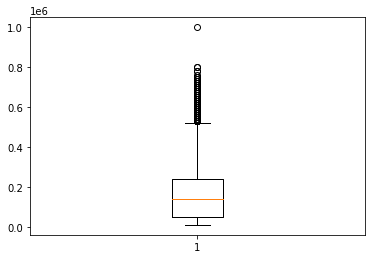

In [111]:
# Percentile distribution and summary statistics
print('Min = ', credit_data['LIMIT_BAL'].min())
print('Max = ', credit_data['LIMIT_BAL'].max())
print('Mean = ', credit_data['LIMIT_BAL'].mean())
print('Median', credit_data['LIMIT_BAL'].median())

percentile = credit_data['LIMIT_BAL'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['LIMIT_BAL'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['LIMIT_BAL'])
plt.show()

In [112]:
credit_data['LIMIT_BAL'][credit_data['LIMIT_BAL'] >= 500000].value_counts()

500000.0     722
550000.0      21
520000.0      20
510000.0      19
600000.0      16
580000.0      11
610000.0      11
530000.0      10
560000.0      10
620000.0       9
570000.0       8
700000.0       8
640000.0       7
630000.0       7
540000.0       6
590000.0       6
710000.0       6
680000.0       4
750000.0       4
670000.0       3
660000.0       3
720000.0       3
650000.0       3
740000.0       2
800000.0       2
780000.0       2
730000.0       2
1000000.0      1
760000.0       1
690000.0       1
Name: LIMIT_BAL, dtype: int64

In [113]:
# Findings : 550000 and above can be considered as outliers. Less tha 1%. 
# Action : Impute with median

### 2. AGE
Age of client in years. Age can be treated as both discrete and continuous.

21
79
35.4855
34.0
0.00    21.0
0.05    23.0
0.10    25.0
0.25    28.0
0.40    31.0
0.50    34.0
0.75    41.0
0.80    43.0
0.90    49.0
1.00    79.0
Name: AGE, dtype: float64
0.91    49.0
0.92    50.0
0.93    51.0
0.94    52.0
0.95    53.0
0.96    54.0
0.97    55.0
0.98    57.0
0.99    60.0
1.00    79.0
Name: AGE, dtype: float64


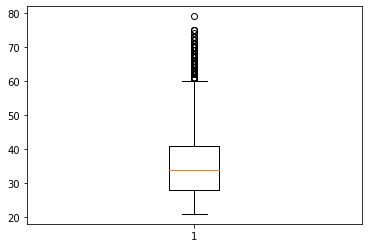

In [114]:
# Percentile distribution and summary statistics
print(credit_data['AGE'].min())
print(credit_data['AGE'].max())
print(credit_data['AGE'].mean())
print(credit_data['AGE'].median())

percentile = credit_data['AGE'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['AGE'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['AGE'])
plt.show()

In [115]:
credit_data[credit_data['AGE']>63] # Retirement age in Taiwan is 63

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
246,247,250000.0,2,2,1,75,0,-1,-1,-1,...,1010.0,5572.0,794.0,1631.0,1536.0,1010.0,5572.0,794.0,1184.0,0
387,388,80000.0,1,3,1,73,-1,0,0,2,...,70646.0,72870.0,75018.0,3500.0,4330.0,3500.0,3500.0,3500.0,5100.0,1
1029,1030,30000.0,2,2,1,67,2,2,0,0,...,29499.0,30124.0,26855.0,0.0,1500.0,2182.0,1200.0,0.0,2302.0,1
1058,1059,80000.0,2,3,1,67,0,0,0,0,...,29236.0,10662.0,2408.0,6000.0,5002.0,10662.0,2.0,2408.0,11662.0,0
1073,1074,360000.0,1,6,1,66,-1,-1,-1,-1,...,151858.0,48580.0,1451.0,75351.0,4064.0,152618.0,48822.0,1451.0,171944.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29149,29150,30000.0,2,3,1,67,2,2,2,0,...,29112.0,29555.0,28536.0,3580.0,0.0,1800.0,1200.0,1083.0,1200.0,0
29163,29164,360000.0,2,3,1,73,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
29173,29174,360000.0,2,1,1,64,-2,-2,-2,-2,...,0.0,5640.0,0.0,4900.0,0.0,0.0,5640.0,0.0,0.0,0
29175,29176,160000.0,2,3,1,74,0,0,0,-1,...,16905.0,0.0,19789.0,3783.0,2268.0,16905.0,0.0,19789.0,26442.0,0


In [116]:
# Findings : Consider age > 63 as outliers. 143 rows, so less than 1%. Impute with median

## Sanity Checks
Since the amount can vary widely from 10,000 to 1 million, only percentile distribution is not enough to validate the data. We need to understand the relationship between bill amount and paid amount of all the months to arrive at a conclusion. The following are a list of test cases that we will perform to check the relationship between data.

#### Test cases
* What is the relationship between bill amount and previously paid amount for each successive month?
* Is the bill amount greater than credit limit ?
* Is the paid amount greater than credit limit ?
* Is the paid amount greater than previous month bill?
If yes, what is the current month bill?
* In which condition is the bill amount negative ?
* Is default status directly related to september bill or paid amount?
* Is the paid amount negative ?

In [117]:
sample_data = credit_data[['LIMIT_BAL','BILL_AMT6','PAY_AMT6','BILL_AMT5','PAY_AMT5','BILL_AMT4','PAY_AMT4','BILL_AMT3','PAY_AMT3','BILL_AMT2','PAY_AMT2','BILL_AMT1','PAY_AMT1','DEFAULT']]


In [118]:
# relationship between month-wise bill amount and paid amount
sample_data.sample(10)

,LIMIT_BAL,BILL_AMT6,PAY_AMT6,BILL_AMT5,PAY_AMT5,BILL_AMT4,PAY_AMT4,BILL_AMT3,PAY_AMT3,BILL_AMT2,PAY_AMT2,BILL_AMT1,PAY_AMT1,DEFAULT
28243,110000.0,89925.0,3472.0,90129.0,3322.0,91983.0,3100.0,93984.0,4109.0,189688.0,5000.0,95986.0,4300.0,0
11238,180000.0,1802.0,3691.0,4300.0,1802.0,2056.0,4300.0,598.0,2056.0,1260.0,598.0,390.0,1260.0,0
23369,270000.0,122213.0,5000.0,127080.0,4530.0,131241.0,5037.0,132405.0,4728.0,127741.0,7028.0,126642.0,4500.0,0
9936,50000.0,9263.0,200.0,9294.0,500.0,9468.0,500.0,9641.0,500.0,8451.0,1500.0,10420.0,1310.0,0
10761,180000.0,536.0,629.0,536.0,536.0,1123.0,536.0,536.0,1123.0,2014.0,536.0,2658.0,2014.0,1
15768,50000.0,34549.0,1.0,32929.0,3768.0,33886.0,1324.0,34212.0,2004.0,34364.0,1861.0,35158.0,1544.0,1
19557,500000.0,167748.0,8008.0,196150.0,15008.0,170407.0,60030.0,170225.0,20031.0,188873.0,10093.0,208068.0,30072.0,0
14511,500000.0,13398.0,527143.0,59587.0,13398.0,254571.0,2000.0,168052.0,156000.0,58665.0,170119.0,1089.0,58665.0,0
15940,250000.0,1280.0,440.0,440.0,1280.0,860.0,440.0,860.0,860.0,860.0,860.0,860.0,860.0,0
14326,290000.0,2345.0,9139.0,3586.0,2345.0,302.0,5228.0,3268.0,800.0,-204.0,3600.0,8690.0,0.0,0


Findings
1. Month-wise bill amount and paid amount look logical in most cases. Relationship between bill amount and paid amount is as normally expected.
2. Default status is not directly related to September bill amount or paid amount.

In [119]:
# bill amount greater than credit limit
sample_data[sample_data['BILL_AMT1']>=sample_data['LIMIT_BAL']]
sample_data[sample_data['BILL_AMT2']>=sample_data['LIMIT_BAL']]
sample_data[sample_data['BILL_AMT3']>=sample_data['LIMIT_BAL']]
sample_data[sample_data['BILL_AMT4']>=sample_data['LIMIT_BAL']]
sample_data[sample_data['BILL_AMT5']>=sample_data['LIMIT_BAL']]
sample_data[sample_data['BILL_AMT6']>=sample_data['LIMIT_BAL']]

,LIMIT_BAL,BILL_AMT6,PAY_AMT6,BILL_AMT5,PAY_AMT5,BILL_AMT4,PAY_AMT4,BILL_AMT3,PAY_AMT3,BILL_AMT2,PAY_AMT2,BILL_AMT1,PAY_AMT1,DEFAULT
49,20000.0,20063.0,1069.0,20480.0,912.0,19865.0,928.0,19476.0,704.0,18479.0,1315.0,17447.0,1318.0,0
120,50000.0,51143.0,0.0,49318.0,2800.0,48851.0,1400.0,48953.0,1000.0,45976.0,4035.0,46004.0,1000.0,1
189,20000.0,20487.0,0.0,20219.0,760.0,20835.0,0.0,21461.0,0.0,21087.0,1000.0,21703.0,0.0,0
203,120000.0,122135.0,5000.0,119131.0,5000.0,116000.0,5000.0,113736.0,4152.0,110578.0,5000.0,107314.0,5000.0,0
221,330000.0,330121.0,11678.0,335760.0,12213.0,333860.0,12450.0,335527.0,12116.0,334954.0,12378.0,335196.0,12388.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29832,20000.0,20090.0,5582.0,20042.0,507.0,20632.0,468.0,18781.0,6668.0,19656.0,3000.0,19027.0,1279.0,0
29850,50000.0,51345.0,1727.0,53589.0,2002.0,55774.0,1967.0,58108.0,2000.0,60180.0,2200.0,62315.0,2200.0,0
29883,420000.0,489200.0,11000.0,489200.0,0.0,479800.0,10000.0,483277.0,11000.0,466810.0,24000.0,454391.0,20000.0,0
29976,40000.0,46934.0,0.0,47151.0,3520.0,51259.0,0.0,53415.0,2000.0,54892.0,0.0,52358.0,4000.0,1


In [120]:
# payment amount greater than credit limit
sample_data[sample_data['PAY_AMT1']>=sample_data['LIMIT_BAL']]
sample_data[sample_data['PAY_AMT2']>=sample_data['LIMIT_BAL']]
sample_data[sample_data['PAY_AMT3']>=sample_data['LIMIT_BAL']]
sample_data[sample_data['PAY_AMT4']>=sample_data['LIMIT_BAL']]
sample_data[sample_data['PAY_AMT5']>=sample_data['LIMIT_BAL']]
sample_data[sample_data['PAY_AMT6']>=sample_data['LIMIT_BAL']]

,LIMIT_BAL,BILL_AMT6,PAY_AMT6,BILL_AMT5,PAY_AMT5,BILL_AMT4,PAY_AMT4,BILL_AMT3,PAY_AMT3,BILL_AMT2,PAY_AMT2,BILL_AMT1,PAY_AMT1,DEFAULT
290,280000.0,-339603.0,345293.0,325.0,0.0,898.0,325.0,325.0,898.0,898.0,325.0,898.0,898.0,1
506,500000.0,200.0,528666.0,222831.0,200.0,249445.0,100.0,285138.0,4989.0,0.0,285138.0,3959.0,0.0,0
1495,170000.0,12646.0,173869.0,25292.0,0.0,37938.0,0.0,51184.0,0.0,64683.0,0.0,75960.0,2000.0,0
2262,220000.0,39819.0,223833.0,213824.0,800.0,216988.0,0.0,210839.0,8275.0,216099.0,0.0,215477.0,5516.0,0
3259,20000.0,-1216.0,20538.0,17484.0,1300.0,19349.0,1360.0,19907.0,607.0,19927.0,1500.0,20376.0,2000.0,0
3448,150000.0,30312.0,201277.0,136084.0,34880.0,129768.0,42000.0,149313.0,40000.0,152179.0,6000.0,145074.0,11000.0,0
3558,10000.0,0.0,13460.0,3551.0,0.0,876.0,3551.0,757.0,876.0,2731.0,757.0,1082.0,2731.0,0
3563,90000.0,66762.0,90000.0,91442.0,2977.0,98257.0,3154.0,105806.0,2915.0,118666.0,0.0,124457.0,6600.0,1
4710,50000.0,3685.0,52681.0,12122.0,11304.0,-250.0,32132.0,48599.0,112.0,45888.0,7060.0,30382.0,54608.0,0
4876,110000.0,123449.0,117880.0,126242.0,0.0,138071.0,7800.0,154733.0,4700.0,169795.0,6700.0,184406.0,7400.0,0


Finding : Data pattern is ok in most cases for both bill amount and paid amount . Normal scenario.

In [121]:
# payment amount greater than bill amount
sample_data[sample_data['PAY_AMT1']>sample_data['BILL_AMT1']]
sample_data[sample_data['PAY_AMT2']>sample_data['BILL_AMT2']]
sample_data[sample_data['PAY_AMT3']>sample_data['BILL_AMT3']]
sample_data[sample_data['PAY_AMT4']>sample_data['BILL_AMT4']]
sample_data[sample_data['PAY_AMT5']>sample_data['BILL_AMT5']]
sample_data[sample_data['PAY_AMT6']>sample_data['BILL_AMT6']]

,LIMIT_BAL,BILL_AMT6,PAY_AMT6,BILL_AMT5,PAY_AMT5,BILL_AMT4,PAY_AMT4,BILL_AMT3,PAY_AMT3,BILL_AMT2,PAY_AMT2,BILL_AMT1,PAY_AMT1,DEFAULT
7,100000.0,567.0,1542.0,-159.0,1687.0,221.0,581.0,601.0,0.0,380.0,601.0,11876.0,380.0,0
20,130000.0,930.0,33764.0,11802.0,930.0,20616.0,2000.0,24489.0,1000.0,27688.0,1537.0,38358.0,3000.0,0
23,450000.0,0.0,1128.0,0.0,0.0,560.0,0.0,1473.0,560.0,19420.0,1473.0,5512.0,19428.0,1
26,60000.0,-189.0,1000.0,127.0,0.0,-57.0,500.0,259.0,0.0,-425.0,1000.0,-109.0,0.0,1
33,500000.0,8981.0,51582.0,71439.0,981.0,7521.0,71439.0,22722.0,7521.0,4152.0,22827.0,10929.0,4152.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29942,130000.0,1215.0,2402.0,1585.0,1215.0,2756.0,1585.0,2831.0,2756.0,1826.0,2831.0,1475.0,1826.0,1
29943,500000.0,8274.0,9363.0,14692.0,206.0,12058.0,14725.0,20189.0,3063.0,27546.0,6056.0,31504.0,12160.0,0
29954,180000.0,47417.0,70052.0,1415.0,57317.0,14834.0,66.0,28674.0,1526.0,44638.0,1588.0,51323.0,2124.0,0
29958,230000.0,-191.0,0.0,613.0,0.0,417.0,1000.0,221.0,1000.0,25.0,1000.0,4261.0,1000.0,0


FINDINGS: It is possible that a customer spent some more money after receiving the bill and then made the payment. So the payment amount would also cover those additional expenses, and it can be greater than bill amount. Logically possible. Data is normal.

In [122]:
# Test Case - When the bill amount is negative, is the data pattern normal

sample_data[sample_data['BILL_AMT1'] < 0]
sample_data[sample_data['BILL_AMT2'] < 0]
sample_data[sample_data['BILL_AMT3'] < 0]
sample_data[sample_data['BILL_AMT4'] < 0]
sample_data[sample_data['BILL_AMT5'] < 0]
sample_data[sample_data['BILL_AMT6'] < 0]

,LIMIT_BAL,BILL_AMT6,PAY_AMT6,BILL_AMT5,PAY_AMT5,BILL_AMT4,PAY_AMT4,BILL_AMT3,PAY_AMT3,BILL_AMT2,PAY_AMT2,BILL_AMT1,PAY_AMT1,DEFAULT
26,60000.0,-189.0,1000.0,127.0,0.0,-57.0,500.0,259.0,0.0,-425.0,1000.0,-109.0,0.0,1
35,160000.0,-1884.0,0.0,-1488.0,792.0,-923.0,565.0,-527.0,396.0,-131.0,396.0,30265.0,131.0,0
109,360000.0,-103.0,0.0,-103.0,0.0,-103.0,0.0,-103.0,0.0,-103.0,0.0,-103.0,0.0,0
134,30000.0,-780.0,1560.0,17603.0,0.0,25350.0,500.0,26712.0,0.0,26145.0,1400.0,28452.0,2000.0,0
167,100000.0,-246.0,50000.0,22979.0,12.0,29336.0,1398.0,58824.0,1330.0,96847.0,0.0,102349.0,3166.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29862,50000.0,-52.0,7000.0,-52.0,0.0,4768.0,0.0,3853.0,1020.0,5404.0,1200.0,1529.0,1200.0,1
29921,410000.0,-15.0,0.0,1421.0,0.0,1467.0,1428.0,420393.0,1474.0,411016.0,18600.0,468749.0,17259.0,1
29922,150000.0,-18.0,0.0,-18.0,0.0,-18.0,0.0,-18.0,0.0,-18.0,0.0,-18.0,0.0,0
29931,60000.0,-11798.0,28000.0,9971.0,0.0,26940.0,0.0,44004.0,1200.0,50643.0,2000.0,61118.0,2200.0,0


FINDINGS : In most cases the bill amount is negative when the paid amount is more than the bill amount. This is normal. There can be more transactions in that month which are not yet reflected in the bill amount.

In [123]:
# test case - Is paid amount negative

sample_data[sample_data['PAY_AMT1'] < 0] # No records
sample_data[sample_data['PAY_AMT2'] < 0] # No records
sample_data[sample_data['PAY_AMT3'] < 0] # No records
sample_data[sample_data['PAY_AMT4'] < 0] # No records
sample_data[sample_data['PAY_AMT5'] < 0] # No records
sample_data[sample_data['PAY_AMT6'] < 0] # No records

# FINDINGS : Result is as expected. Data is ok.

,LIMIT_BAL,BILL_AMT6,PAY_AMT6,BILL_AMT5,PAY_AMT5,BILL_AMT4,PAY_AMT4,BILL_AMT3,PAY_AMT3,BILL_AMT2,PAY_AMT2,BILL_AMT1,PAY_AMT1,DEFAULT


### 3. BILL_AMT1
Amount of bill statement in September, 2005 (NT dollar)

-165580.0
964511.0
51223.3309
22381.5
0.00   -165580.00
0.05         0.00
0.10       278.90
0.25      3558.75
0.40     13469.20
0.50     22381.50
0.75     67091.00
0.80     83421.20
0.90    142133.70
1.00    964511.00
Name: BILL_AMT1, dtype: float64
0.91    151214.72
0.92    162127.84
0.93    173630.63
0.94    187074.56
0.95    201203.05
0.96    220592.72
0.97    245969.84
0.98    282227.68
0.99    350110.68
1.00    964511.00
Name: BILL_AMT1, dtype: float64


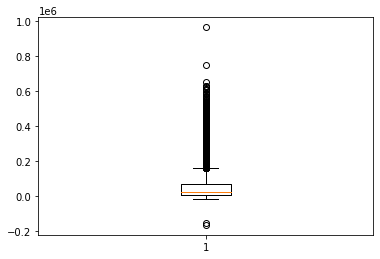

In [124]:
# Percentile distribution and summary statistics

print(credit_data['BILL_AMT1'].min())
print(credit_data['BILL_AMT1'].max())
print(credit_data['BILL_AMT1'].mean())
print(credit_data['BILL_AMT1'].median())

percentile = credit_data['BILL_AMT1'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['BILL_AMT1'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['BILL_AMT1'])
plt.show()

In [125]:
credit_data['BILL_AMT1'][credit_data['BILL_AMT1']<-100000]

12330   -165580.0
23003   -154973.0
Name: BILL_AMT1, dtype: float64

In [126]:
# Findings

# Two large negative values are far away from the median. Treat them as outliers.
# Treat values > 350,000 as outliers. Around 1%
# Impute with median


### 4. BILL_AMT2
Amount of bill statement in August, 2005 (NT dollar)

-69777.0
983931.0
49179.07516666667
21200.0
0.00    -69777.00
0.05         0.00
0.10         0.00
0.25      2984.75
0.40     12799.60
0.50     21200.00
0.75     64006.25
0.80     80292.20
0.90    136905.50
1.00    983931.00
Name: BILL_AMT2, dtype: float64
0.91    145064.86
0.92    155362.72
0.93    167485.28
0.94    180578.40
0.95    194792.20
0.96    211343.08
0.97    236662.72
0.98    274120.58
0.99    337495.28
1.00    983931.00
Name: BILL_AMT2, dtype: float64


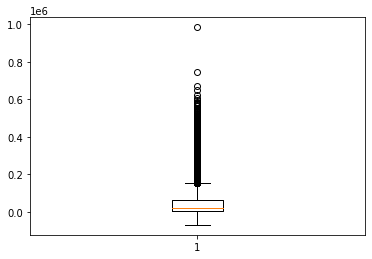

In [127]:
# Percentile distribution and summary statistics

print(credit_data['BILL_AMT2'].min())
print(credit_data['BILL_AMT2'].max())
print(credit_data['BILL_AMT2'].mean())
print(credit_data['BILL_AMT2'].median())

percentile = credit_data['BILL_AMT2'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['BILL_AMT2'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['BILL_AMT2'])
plt.show()

In [128]:
# FIndings : Values greater than 337495.28 can be considered as outliers (1%)
# Impute with median

### 5. BILL_AMT3
Amount of bill statement in July, 2005 (NT dollar)

-157264.0
1664089.0
47013.1548
20088.5
0.00    -157264.00
0.05          0.00
0.10          0.00
0.25       2666.25
0.40      12197.20
0.50      20088.50
0.75      60164.75
0.80      76777.40
0.90     132051.30
1.00    1664089.00
Name: BILL_AMT3, dtype: float64
0.91     139419.08
0.92     148633.24
0.93     160049.77
0.94     173241.34
0.95     187821.05
0.96     203652.80
0.97     228277.79
0.98     263208.54
0.99     325030.39
1.00    1664089.00
Name: BILL_AMT3, dtype: float64


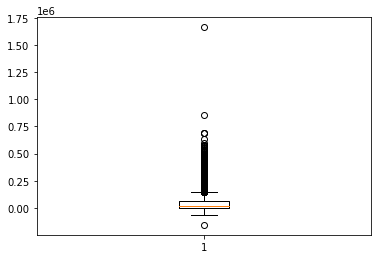

In [129]:
# Percentile distribution and summary statistics

print(credit_data['BILL_AMT3'].min())
print(credit_data['BILL_AMT3'].max())
print(credit_data['BILL_AMT3'].mean())
print(credit_data['BILL_AMT3'].median())

percentile = credit_data['BILL_AMT3'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['BILL_AMT3'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['BILL_AMT3'])
plt.show()

In [130]:
credit_data[credit_data['BILL_AMT3'] <= -157264.00]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
18115,18116,170000.0,1,1,2,48,0,0,0,-1,...,166969.0,164040.0,166416.0,5079.0,0.0,332809.0,6000.0,6000.0,6100.0,0


In [131]:
# Findings : -157264.00 is outlier
# Values > 325000 can be considered outliers (1%)
# impute with median

### 6. BILL_AMT4
Amount of bill statement in June, 2005 (NT dollar)

-170000.0
891586.0
43262.94896666666
19052.0
0.00   -170000.00
0.05         0.00
0.10         0.00
0.25      2326.75
0.40     11145.00
0.50     19052.00
0.75     54506.00
0.80     70579.00
0.90    122418.70
1.00    891586.00
Name: BILL_AMT4, dtype: float64
0.91    130937.09
0.92    138646.80
0.93    148287.35
0.94    160944.12
0.95    174333.35
0.96    190088.52
0.97    210965.51
0.98    246655.72
0.99    304997.27
1.00    891586.00
Name: BILL_AMT4, dtype: float64


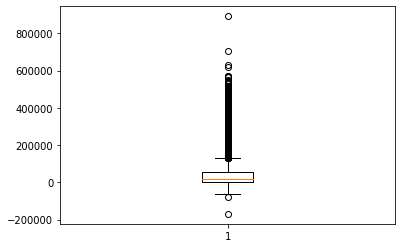

In [132]:
# Percentile distribution and summary statistics

print(credit_data['BILL_AMT4'].min())
print(credit_data['BILL_AMT4'].max())
print(credit_data['BILL_AMT4'].mean())
print(credit_data['BILL_AMT4'].median())

percentile = credit_data['BILL_AMT4'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['BILL_AMT4'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['BILL_AMT4'])
plt.show()

In [133]:
credit_data[credit_data['BILL_AMT4'] <= -170000]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
3183,3184,260000.0,1,3,1,48,0,0,0,0,...,-170000.0,171696.0,174151.0,8812.0,9158.0,0.0,497000.0,10000.0,7000.0,0


In [134]:
# Findings : -170000 is outlier
# Values > 305000 can be considered outliers
# Impute with median

### 7. BILL_AMT5
Amount of bill statement in May, 2005 (NT dollar)

-81334.0
927171.0
40311.40096666667
18104.5
0.00    -81334.0
0.05         0.0
0.10         0.0
0.25      1763.0
0.40      9809.2
0.50     18104.5
0.75     50190.5
0.80     65823.0
0.90    115883.0
1.00    927171.0
Name: BILL_AMT5, dtype: float64
0.91    123655.36
0.92    132233.96
0.93    141291.49
0.94    151270.38
0.95    165794.30
0.96    181044.44
0.97    198861.03
0.98    228587.04
0.99    285868.33
1.00    927171.00
Name: BILL_AMT5, dtype: float64


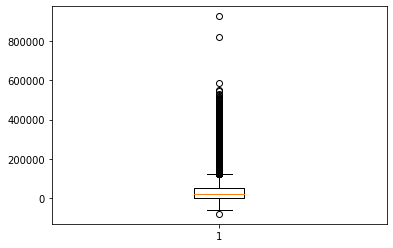

In [135]:
# Percentile distribution and summary statistics

print(credit_data['BILL_AMT5'].min())
print(credit_data['BILL_AMT5'].max())
print(credit_data['BILL_AMT5'].mean())
print(credit_data['BILL_AMT5'].median())

percentile = credit_data['BILL_AMT5'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['BILL_AMT5'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['BILL_AMT5'])
plt.show()

In [136]:
# Findings : Values > 285868.33 can be treated as outliers (1%). Impute with median

### 8. BILL_AMT6
Amount of bill statement in April, 2005 (NT dollar)

-339603.0
961664.0
38871.7604
17071.0
0.00   -339603.00
0.05         0.00
0.10         0.00
0.25      1256.00
0.40      8770.20
0.50     17071.00
0.75     49198.25
0.80     63150.60
0.90    112110.40
1.00    961664.00
Name: BILL_AMT6, dtype: float64
0.91    120740.53
0.92    129224.48
0.93    137836.47
0.94    148093.84
0.95    161912.00
0.96    177592.76
0.97    195114.30
0.98    223436.14
0.99    279505.06
1.00    961664.00
Name: BILL_AMT6, dtype: float64


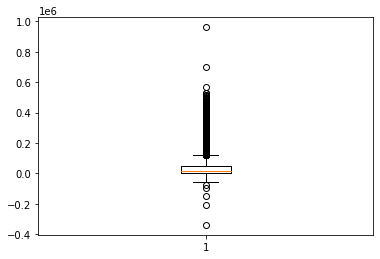

In [137]:
# Percentile distribution and summary statistics

print(credit_data['BILL_AMT6'].min())
print(credit_data['BILL_AMT6'].max())
print(credit_data['BILL_AMT6'].mean())
print(credit_data['BILL_AMT6'].median())

percentile = credit_data['BILL_AMT6'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['BILL_AMT6'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['BILL_AMT6'])
plt.show()

In [138]:
credit_data[['BILL_AMT6']].sort_values(['BILL_AMT6']).head(10)


,BILL_AMT6
290,-339603.0
26097,-209051.0
12828,-150953.0
29491,-94625.0
28919,-73895.0
27080,-57060.0
12388,-51443.0
3525,-51183.0
21235,-46627.0
5548,-45734.0


In [139]:
# Findings : Values <= -73895 are outliers
# Values > 279505.06 are outliers (1%)
# Impute with median


FINDINGS : There are a few data points which are like outliers but logically correct. However, to train the model we need to remove the outliers. Here, the 12 variables of bill amount and paid amount are inter-related. So we have to keep in mind that imputing with mean or median will make the data inconsistent for that ID.

### 9. PAY_AMT1
Amount of previous payment in September, 2005 (NT dollar)

0.0
873552.0
5663.5805
2100.0
0.00         0.0
0.05         0.0
0.10         0.0
0.25      1000.0
0.40      1724.0
0.50      2100.0
0.75      5006.0
0.80      6192.2
0.90     10300.0
1.00    873552.0
Name: PAY_AMT1, dtype: float64
0.91     11174.00
0.92     12500.00
0.93     14127.07
0.94     15510.66
0.95     18428.20
0.96     21006.24
0.97     28232.78
0.98     40000.00
0.99     66522.18
1.00    873552.00
Name: PAY_AMT1, dtype: float64


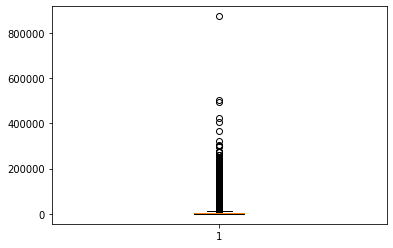

In [140]:
# Percentile distribution and summary statistics

print(credit_data['PAY_AMT1'].min())
print(credit_data['PAY_AMT1'].max())
print(credit_data['PAY_AMT1'].mean())
print(credit_data['PAY_AMT1'].median())


percentile = credit_data['PAY_AMT1'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['PAY_AMT1'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['PAY_AMT1'])
plt.show()

In [141]:
credit_data['PAY_AMT1'][credit_data['PAY_AMT1'] >= 35000]
# 691 records. 2.5% approx

6         55000.0
88        40000.0
182       70010.0
186       57087.0
193       37867.0
           ...   
29948     39032.0
29963    323014.0
29970     52951.0
29988     65000.0
29998     85900.0
Name: PAY_AMT1, Length: 691, dtype: float64

In [142]:
# Findings : Values >=35000 can be considered outliers. 2.5%
# Impute with median

### 10. PAY_AMT2
Amount of previous payment in August, 2005 (NT dollar)

0.0
1684259.0
5921.1635
2009.0
0.00          0.0
0.05          0.0
0.10          0.0
0.25        833.0
0.40       1600.0
0.50       2009.0
0.75       5000.0
0.80       6000.0
0.90      10401.1
1.00    1684259.0
Name: PAY_AMT2, dtype: float64
0.91      11320.00
0.92      12536.16
0.93      14131.26
0.94      16000.00
0.95      19004.35
0.96      21408.36
0.97      29000.00
0.98      41027.88
0.99      76651.02
1.00    1684259.00
Name: PAY_AMT2, dtype: float64


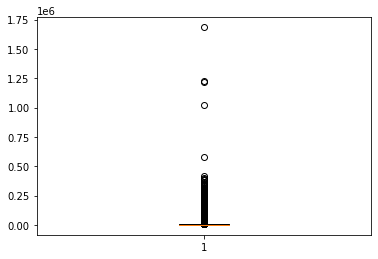

In [143]:
# Percentile distribution and summary statistics

print(credit_data['PAY_AMT2'].min())
print(credit_data['PAY_AMT2'].max())
print(credit_data['PAY_AMT2'].mean())
print(credit_data['PAY_AMT2'].median())

percentile = credit_data['PAY_AMT2'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['PAY_AMT2'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['PAY_AMT2'])
plt.show()

In [144]:
credit_data[credit_data['PAY_AMT2'] >= 41028]
# 600 rows = 2%

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
102,103,480000.0,1,1,1,63,0,0,0,2,...,487066.0,471145.0,469961.0,16078.0,55693.0,17000.0,0.0,18000.0,24200.0,0
343,344,180000.0,1,1,1,39,0,0,-1,0,...,122295.0,-1005.0,1005.0,11000.0,145000.0,26000.0,0.0,101005.0,1898.0,0
351,352,200000.0,1,1,1,36,1,-2,-1,-1,...,-3684.0,0.0,1386.0,10118.0,47015.0,0.0,4000.0,100000.0,10000.0,0
359,360,260000.0,1,1,1,34,-1,-1,-1,-1,...,2351.0,34039.0,291.0,291.0,51058.0,35696.0,34039.0,291.0,291.0,0
414,415,480000.0,2,3,1,41,-2,-2,-2,-2,...,9033.0,19371.0,22593.0,26734.0,199982.0,9033.0,19371.0,22593.0,2000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29906,29907,150000.0,1,3,2,29,0,0,-1,-1,...,20546.0,27228.0,3270.0,46060.0,81620.0,184133.0,17322.0,3279.0,6222.0,0
29957,29958,500000.0,1,2,2,31,0,0,-1,0,...,278725.0,89161.0,87863.0,6025.0,294318.0,10254.0,7524.0,5009.0,2333.0,0
29959,29960,290000.0,1,1,2,32,-1,-1,-1,-1,...,35379.0,18711.0,3110.0,1575.0,108168.0,35811.0,18711.0,0.0,157.0,0
29970,29971,360000.0,1,1,1,34,-1,-1,-1,0,...,49005.0,8676.0,19487.0,52951.0,64535.0,8907.0,53.0,19584.0,16080.0,0


In [145]:
# Findings : Values > 50000 can be treated as outliers
# Impute with median

### 11. PAY_AMT3
Amount of previous payment in July, 2005 (NT dollar)

0.0
896040.0
5225.6815
1800.0
0.00         0.0
0.05         0.0
0.10         0.0
0.25       390.0
0.40      1206.0
0.50      1800.0
0.75      4505.0
0.80      5284.0
0.90     10000.0
1.00    896040.0
Name: PAY_AMT3, dtype: float64
0.91     10288.36
0.92     11558.48
0.93     13000.00
0.94     15000.00
0.95     17589.40
0.96     20150.00
0.97     27000.33
0.98     38661.36
0.99     70000.00
1.00    896040.00
Name: PAY_AMT3, dtype: float64


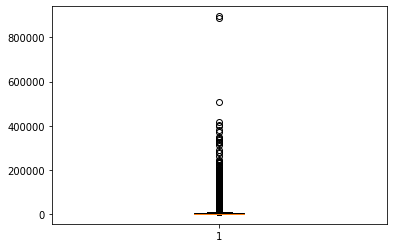

In [146]:
# Percentile distribution and summary statistics

print(credit_data['PAY_AMT3'].min())
print(credit_data['PAY_AMT3'].max())
print(credit_data['PAY_AMT3'].mean())
print(credit_data['PAY_AMT3'].median())

percentile = credit_data['PAY_AMT3'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['PAY_AMT3'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['PAY_AMT3'])
plt.show()

In [147]:
# Findings : Values > 38662 can be considered outliers (2%)
# Impute with median

### 12. PAY_AMT4
Amount of previous payment in June, 2005 (NT dollar)

0.0
621000.0
4826.076866666666
1500.0
0.00         0.00
0.05         0.00
0.10         0.00
0.25       296.00
0.40      1000.00
0.50      1500.00
0.75      4013.25
0.80      5000.00
0.90      9570.60
1.00    621000.00
Name: PAY_AMT4, dtype: float64
0.91     10000.00
0.92     10404.72
0.93     11985.21
0.94     13949.60
0.95     16014.95
0.96     20000.00
0.97     26665.40
0.98     39634.04
0.99     67054.44
1.00    621000.00
Name: PAY_AMT4, dtype: float64


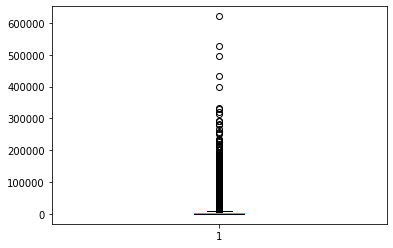

In [148]:
# Percentile distribution and summary statistics

print(credit_data['PAY_AMT4'].min())
print(credit_data['PAY_AMT4'].max())
print(credit_data['PAY_AMT4'].mean())
print(credit_data['PAY_AMT4'].median())

percentile = credit_data['PAY_AMT4'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['PAY_AMT4'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['PAY_AMT4'])
plt.show()

In [149]:
credit_data[credit_data['PAY_AMT4'] >= 35000]
# 669 records = 2.3%

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
33,34,500000.0,2,2,1,54,-2,-2,-2,-2,...,7521.0,71439.0,8981.0,4152.0,22827.0,7521.0,71439.0,981.0,51582.0,0
40,41,360000.0,1,1,2,33,0,0,0,0,...,628699.0,195969.0,179224.0,10000.0,7000.0,6000.0,188840.0,28000.0,4000.0,0
74,75,340000.0,1,1,2,32,-1,-1,-1,-1,...,4291.0,80153.0,25820.0,5713.0,23453.0,4314.0,80552.0,25949.0,2016.0,0
81,82,360000.0,2,1,2,26,0,0,0,0,...,33100.0,180000.0,196.0,4796.0,3400.0,3100.0,146900.0,196.0,2963.0,0
153,154,280000.0,2,2,1,56,0,0,0,0,...,101783.0,177145.0,169311.0,8042.0,6700.0,5137.0,100000.0,7000.0,6321.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29742,29743,230000.0,1,1,2,32,0,0,0,0,...,102518.0,129195.0,101717.0,8316.0,10084.0,5091.0,70063.0,4037.0,5122.0,0
29816,29817,80000.0,1,2,2,42,1,4,3,2,...,81545.0,51338.0,50826.0,0.0,639.0,0.0,50918.0,2000.0,2000.0,0
29821,29822,500000.0,1,1,1,44,-1,-1,-1,-1,...,12925.0,75667.0,67609.0,367.0,16652.0,76146.0,67697.0,67609.0,71946.0,0
29852,29853,500000.0,1,2,1,44,-1,-1,-1,-1,...,949.0,86362.0,-8.0,13053.0,2556.0,955.0,86793.0,0.0,1793.0,0


In [150]:
# Findings : Values > 35000 can be considered outliers
# Impute with median

### 13. PAY_AMT5
Amount of previous payment in May, 2005 (NT dollar)

0.0
426529.0
4799.387633333334
1500.0
0.00         0.0
0.05         0.0
0.10         0.0
0.25       252.5
0.40      1000.0
0.50      1500.0
0.75      4031.5
0.80      5000.0
0.90      9500.0
1.00    426529.0
Name: PAY_AMT5, dtype: float64
0.91     10000.00
0.92     10358.16
0.93     11964.14
0.94     13939.06
0.95     16000.00
0.96     20000.00
0.97     25314.21
0.98     37259.66
0.99     65607.56
1.00    426529.00
Name: PAY_AMT5, dtype: float64


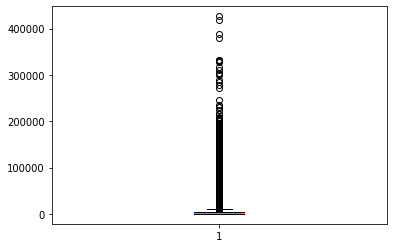

In [151]:
# Percentile distribution and summary statistics

print(credit_data['PAY_AMT5'].min())
print(credit_data['PAY_AMT5'].max())
print(credit_data['PAY_AMT5'].mean())
print(credit_data['PAY_AMT5'].median())

percentile = credit_data['PAY_AMT5'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['PAY_AMT5'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['PAY_AMT5'])
plt.show()

In [152]:
# Findings : Values > 25314 can be considered outliers (3%)
# Impute with median

### 14. PAY_AMT6
Amount of previous payment in April, 2005 (NT dollar)

0.0
528666.0
5215.502566666667
1500.0
0.00         0.00
0.05         0.00
0.10         0.00
0.25       117.75
0.40      1000.00
0.50      1500.00
0.75      4000.00
0.80      5000.00
0.90      9600.00
1.00    528666.00
Name: PAY_AMT6, dtype: float64
0.91     10000.00
0.92     10500.00
0.93     12017.14
0.94     14442.86
0.95     17343.80
0.96     21034.88
0.97     29561.76
0.98     45010.48
0.99     82619.05
1.00    528666.00
Name: PAY_AMT6, dtype: float64


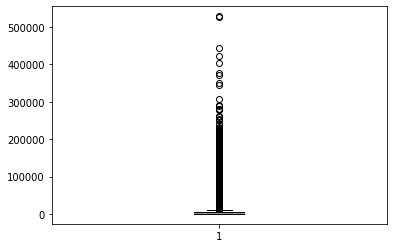

In [153]:
# Percentile distribution and summary statistics

print(credit_data['PAY_AMT6'].min())
print(credit_data['PAY_AMT6'].max())
print(credit_data['PAY_AMT6'].mean())
print(credit_data['PAY_AMT6'].median())

percentile = credit_data['PAY_AMT6'].quantile([0, 0.05, 0.10, 0.25, 0.40, 0.50, 0.75, 0.80, 0.90, 1.0])
print(round(percentile, 2))

percentile1 = credit_data['PAY_AMT6'].quantile([0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0])
print(round(percentile1, 2))

# Boxplot
plt.boxplot(credit_data['PAY_AMT6'])
plt.show()

In [154]:
# Findings : Values > 30000 can be considered as outliers (3%)
# Impute with median

# Data Cleaning

## Continuous Variable Cleaning

### Section I

In [155]:
# LIMIT_BAL
credit_data['LIMIT_BAL'][credit_data['LIMIT_BAL'] >= 550000] = 140000.0

# AGE 
credit_data['AGE'][credit_data['AGE'] > 63] = 34

# BILL_AMT1
credit_data['BILL_AMT1'][credit_data['BILL_AMT1']<-100000] = 22381.5
credit_data['BILL_AMT1'][credit_data['BILL_AMT1']> 350000] = 22381.5

# BILL_AMT2
credit_data['BILL_AMT2'][credit_data['BILL_AMT2']> 337500] = 21200.0

# BILL_AMT3
credit_data['BILL_AMT3'][credit_data['BILL_AMT3']<= -157260] = 20088.5
credit_data['BILL_AMT3'][credit_data['BILL_AMT3']> 325000] = 20088.5

# BILL_AMT4
credit_data['BILL_AMT4'][credit_data['BILL_AMT4']<= -170000] = 19052.0
credit_data['BILL_AMT4'][credit_data['BILL_AMT4']> 305000] = 19052.0

# BILL_AMT5
credit_data['BILL_AMT5'][credit_data['BILL_AMT5']> 285870] = 18104.5

# BILL_AMT6
credit_data['BILL_AMT6'][credit_data['BILL_AMT6']<= -73895] = 17071.0
credit_data['BILL_AMT6'][credit_data['BILL_AMT6']> 279510] = 17071.0


<ipython-input-155-0ce0972d2d37>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_data['LIMIT_BAL'][credit_data['LIMIT_BAL'] >= 550000] = 140000.0
<ipython-input-155-0ce0972d2d37>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_data['AGE'][credit_data['AGE'] > 63] = 34
<ipython-input-155-0ce0972d2d37>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_data['BILL_AMT1'][credit_data['BILL_AMT1']<-100000] = 22381.5
<ip

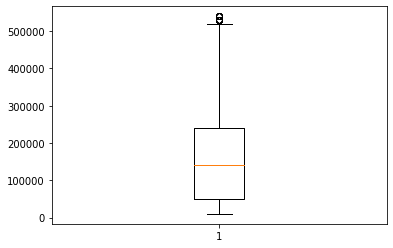

In [156]:
# Plotting the cleaned variables

plt.boxplot(credit_data['LIMIT_BAL'])
plt.show()

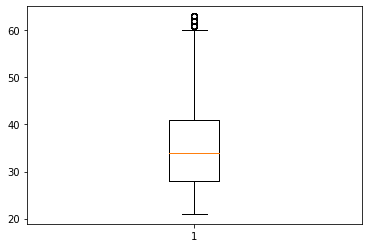

In [157]:
plt.boxplot(credit_data['AGE'])
plt.show()

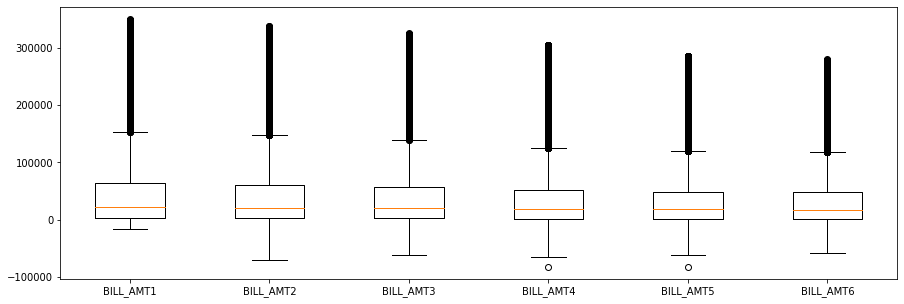

In [158]:
# Plotting the cleaned variables

plt.figure(figsize=(15, 5))
vars = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']

plt.boxplot([credit_data['BILL_AMT1'], credit_data['BILL_AMT2'], credit_data['BILL_AMT3'], 
             credit_data['BILL_AMT4'], credit_data['BILL_AMT5'], credit_data['BILL_AMT6']], labels = vars)
plt.show()

### Section II

In [159]:
# Payment amount variables cleaning

credit_data['PAY_AMT1'][credit_data['PAY_AMT1'] >= 35000] = credit_data['PAY_AMT1'].median()

credit_data['PAY_AMT2'][credit_data['PAY_AMT2'] >= 41028] = credit_data['PAY_AMT2'].median()

credit_data['PAY_AMT3'][credit_data['PAY_AMT3'] >= 38662] = credit_data['PAY_AMT3'].median()

credit_data['PAY_AMT4'][credit_data['PAY_AMT4'] >= 35000] = credit_data['PAY_AMT4'].median()

credit_data['PAY_AMT5'][credit_data['PAY_AMT5'] >= 25314] = credit_data['PAY_AMT5'].median()

credit_data['PAY_AMT6'][credit_data['PAY_AMT6'] >= 30000] = credit_data['PAY_AMT6'].median()

<ipython-input-159-d10bb5e938c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_data['PAY_AMT1'][credit_data['PAY_AMT1'] >= 35000] = credit_data['PAY_AMT1'].median()
<ipython-input-159-d10bb5e938c3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_data['PAY_AMT2'][credit_data['PAY_AMT2'] >= 41028] = credit_data['PAY_AMT2'].median()
<ipython-input-159-d10bb5e938c3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_

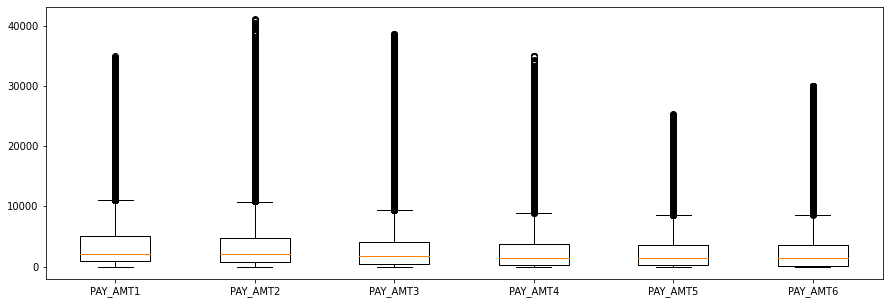

In [160]:
# Plotting the cleaned variables

plt.figure(figsize=(15, 5))
vars = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

plt.boxplot([credit_data['PAY_AMT1'], credit_data['PAY_AMT2'], credit_data['PAY_AMT3'], 
             credit_data['PAY_AMT4'], credit_data['PAY_AMT5'], credit_data['PAY_AMT6']], labels = vars)
plt.show()

## Categorical Variable Cleaning

In [161]:
# MARRIAGE cleaning

crosstab = pd.crosstab(credit_data['MARRIAGE'], credit_data['DEFAULT'])
crosstab
crosstab_perc = crosstab.apply(lambda x: x/x.sum(), axis=1)
round(crosstab_perc, 2)

DEFAULT,0,1
MARRIAGE,,
0,0.91,0.09
1,0.77,0.23
2,0.79,0.21
3,0.74,0.26


In [162]:
# replace 0 with 2
credit_data['MARRIAGE'] = credit_data['MARRIAGE'].replace(0, 2)
credit_data['MARRIAGE'].value_counts()

2    16018
1    13659
3      323
Name: MARRIAGE, dtype: int64

In [163]:
# EDUCATION cleaning

# Combine 0, 5 and 6 to single value 5
credit_data['EDUCATION'] = credit_data['EDUCATION'].replace([0,6], [5,5])
credit_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      345
4      123
Name: EDUCATION, dtype: int64

In [164]:
crosstab = pd.crosstab(credit_data['EDUCATION'], credit_data['DEFAULT'])
crosstab
crosstab_perc = crosstab.apply(lambda x: x/x.sum(), axis=1)
round(crosstab_perc, 2)

DEFAULT,0,1
EDUCATION,,
1,0.81,0.19
2,0.76,0.24
3,0.75,0.25
4,0.94,0.06
5,0.92,0.08


In [165]:
# Replace 5 with 4
credit_data['EDUCATION'] = credit_data['EDUCATION'].replace(5, 4)
credit_data['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

# Feature Engineering

In [166]:
# Changing categorical numbers to category strings

# EDUCATION
credit_data['EDUCATION'].replace([1, 2, 3, 4], ['EDU_GRAD', 'EDU_UNIV', 'EDU_HIGH', 'EDU_OTHER'], inplace=True)
credit_data['EDUCATION'].value_counts()

EDU_UNIV     14030
EDU_GRAD     10585
EDU_HIGH      4917
EDU_OTHER      468
Name: EDUCATION, dtype: int64

In [167]:
# MARRIAGE
credit_data['MARRIAGE'].replace([1, 2, 3], ['MARRIED', 'SINGLE', 'MRG_OTH'], inplace=True)
credit_data['MARRIAGE'].value_counts()

SINGLE     16018
MARRIED    13659
MRG_OTH      323
Name: MARRIAGE, dtype: int64

## One Hot Encoding

In [168]:
credit_data_org = credit_data.copy()

onehot_cols = ['EDUCATION', 'MARRIAGE']

# get dummy variables
for col in onehot_cols:
 one_hot_data = pd.get_dummies(credit_data[col])
 credit_data = pd.concat([credit_data, one_hot_data],axis=1)
print("One hot encoded credit data \n", credit_data)
print(credit_data.columns)

One hot encoded credit data 
           ID  LIMIT_BAL  SEX EDUCATION MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          1    20000.0    2  EDU_UNIV  MARRIED   24      2      2     -1   
1          2   120000.0    2  EDU_UNIV   SINGLE   26     -1      2      0   
2          3    90000.0    2  EDU_UNIV   SINGLE   34      0      0      0   
3          4    50000.0    2  EDU_UNIV  MARRIED   37      0      0      0   
4          5    50000.0    1  EDU_UNIV  MARRIED   57     -1      0     -1   
...      ...        ...  ...       ...      ...  ...    ...    ...    ...   
29995  29996   220000.0    1  EDU_HIGH  MARRIED   39      0      0      0   
29996  29997   150000.0    1  EDU_HIGH   SINGLE   43     -1     -1     -1   
29997  29998    30000.0    1  EDU_UNIV   SINGLE   37      4      3      2   
29998  29999    80000.0    1  EDU_HIGH  MARRIED   41      1     -1      0   
29999  30000    50000.0    1  EDU_UNIV  MARRIED   46      0      0      0   

       PAY_4  ...  PAY_AMT5  PAY_AMT6  DEFAUL

In [169]:
credit_data.drop(['EDUCATION', 'MARRIAGE'], axis=1, inplace=True)
credit_data.columns
credit_data_feat = credit_data.copy()

# Model Building




## Getting Training data and Testing data

In [170]:
from sklearn.model_selection import train_test_split

features = ['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 
            'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
            'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDU_GRAD', 'EDU_HIGH', 'EDU_OTHER', 'EDU_UNIV', 'MARRIED', 'MRG_OTH', 'SINGLE']

X = credit_data[features]
print(X.shape)
print(X.columns)
y = credit_data['DEFAULT']
print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(30000, 29)
Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDU_GRAD', 'EDU_HIGH', 'EDU_OTHER',
       'EDU_UNIV', 'MARRIED', 'MRG_OTH', 'SINGLE'],
      dtype='object')
(30000,)
(24000, 29)
(6000, 29)
(24000,)
(6000,)


## Handling Class Imbalance 

Class 1 is important to us. So we need to handle the class imbalance and train the model.

In [171]:
# Splitting data by target variable classes 0 and 1
train_data = pd.concat([X_train, y_train], axis=1)
print(train_data.shape)

train_class0 = train_data[train_data['DEFAULT'] == 0]
train_class1 = train_data[train_data['DEFAULT'] == 1]

print(train_class0.shape)
print(train_class1.shape)

(24000, 30)
(18681, 30)
(5319, 30)


In [172]:
# Oversampling of minority class 1

train_class1_over = train_class1.sample(len(train_class1)*2, replace=True)
print(train_class1_over.shape)

train_data_bal1 = pd.concat([train_class0, train_class1_over])
print(train_data_bal1.shape)

(10638, 30)
(29319, 30)


In [173]:
# Using SMOTE

X_sampled = train_data_bal1[features]
y_sampled = train_data_bal1['DEFAULT']
print(X_sampled.shape)
print(y_sampled.shape)

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy=0.9, random_state = 10)
X_smote, y_smote = smote.fit_resample(X_sampled, y_sampled)

print(X_smote.shape)
print(y_smote.shape)
print(y_smote.value_counts())


(29319, 29)
(29319,)
(35493, 29)
(35493,)
0    18681
1    16812
Name: DEFAULT, dtype: int64


## Datasets for model building and validation

In [174]:
# Use these datasets for model building and validation

# Train data
X_train = X_smote.copy()
y_train = y_smote.copy()

# Full train data
train_data_bal = pd.concat([X_train, y_train], axis=1)

print(X_train.shape)
print(y_train.shape)
print(train_data_bal.shape)

# Test data
print(X_test.shape)
print(y_test.shape)

# Full test data
test_data_bal = pd.concat([X_test, y_test], axis=1)
print(test_data_bal.shape)

(35493, 29)
(35493,)
(35493, 30)
(6000, 29)
(6000,)
(6000, 30)


## Highlighting an issue with SMOTE when used over one-hot encoded columns

In [176]:
print(X_train.columns)

# EDUCATION one-hot columns : EDU_GRAD, EDU_HIGH, EDU_OTHER, EDU_UNIV
# MARRIAGE one-hit columns : MARRIED, MRG_OTH, SINGLE

# As per one-hot encoding logic, one of the one-hot encoded columns must have value 1, rest all should be 0
# More than one column should not have 1. All columns cannot have 0.

# Let's see if this has remained valid after SMOTE was applied on these columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDU_GRAD', 'EDU_HIGH', 'EDU_OTHER',
       'EDU_UNIV', 'MARRIED', 'MRG_OTH', 'SINGLE'],
      dtype='object')


In [181]:
X_train.shape # 35493 records

# Checking where only one 1 and rest 0 in the education related columns
X_train[['EDU_GRAD','EDU_HIGH','EDU_OTHER','EDU_UNIV']][X_train['EDU_GRAD']+X_train['EDU_HIGH']+X_train['EDU_OTHER']+X_train['EDU_UNIV']==1]
# 33389 rows where this condition holds

# Checking where we have more than one 1s
X_train[['EDU_GRAD','EDU_HIGH','EDU_OTHER','EDU_UNIV']][X_train['EDU_GRAD']+X_train['EDU_HIGH']+X_train['EDU_OTHER']+X_train['EDU_UNIV']>1]
# 0 rows

# Checking where we have all four columns as 0
X_train[['EDU_GRAD','EDU_HIGH','EDU_OTHER','EDU_UNIV']][X_train['EDU_GRAD']+X_train['EDU_HIGH']+X_train['EDU_OTHER']+X_train['EDU_UNIV']==0]
# 2104 columns where we have all 0s



,EDU_GRAD,EDU_HIGH,EDU_OTHER,EDU_UNIV
29319,0,0,0,0
29324,0,0,0,0
29327,0,0,0,0
29328,0,0,0,0
29329,0,0,0,0
...,...,...,...,...
35473,0,0,0,0
35478,0,0,0,0
35488,0,0,0,0
35491,0,0,0,0


This clearly shows there are 2104 records where the one-hot encoding does not hold true. It simply means that the data for education is invalied for these 2104 rows.

Let's check for marriage related columns

In [186]:
# Checking where only one 1 and rest 0 in the marriage related columns
X_train[['MARRIED','MRG_OTH','SINGLE']][X_train['MARRIED']+X_train['MRG_OTH']+X_train['SINGLE']==1]
# 33640 rows where this condition holds. Valid data

# Checking where we have more than one 1s
X_train[['MARRIED','MRG_OTH','SINGLE']][X_train['MARRIED']+X_train['MRG_OTH']+X_train['SINGLE']>1]
# 0 rows

# Checking where we have all four columns as 0
X_train[['MARRIED','MRG_OTH','SINGLE']][X_train['MARRIED']+X_train['MRG_OTH']+X_train['SINGLE']==0]
# 1853 columns where we have all 0s. Invalid data

,MARRIED,MRG_OTH,SINGLE
29319,0,0,0
29321,0,0,0
29323,0,0,0
29324,0,0,0
29328,0,0,0
...,...,...,...
35469,0,0,0
35472,0,0,0
35473,0,0,0
35488,0,0,0


Here also we can clearly see that in this case also we have 1853 records which do not adhere to one-hot encoding logic.

### Reason : 

The algorithm of SMOTE is that it will create a synthetic point by picking 2 random nearby points and take a random value between the two points. Then it will convert the value so that it fits into one of the existing values in the column. Here, the two points will be 0 and 1. Hence, the output of SMOTE will be either 0 or 1. But SMOTE operates on a single column without checking dependency on other columns. Thats why we can have scenarios where values for all concerned columns are zero. It has no way of checking if the synthetic values are violating any relationship with other column values.

For now, we will keep these invalid data also in the dataset and build the model, since the percentage of invalid data is less than 10%. For further projects, we will use SMOTE with care when one-hot encoding is involved. 

### Infinite VIF Dummy variable trap:

Lets say we have four dummy variable(one-hot encoded) columns A, B, C and D. Any of these four columns can be predicted using the remaining three columns. A = 1-(B+C+D). Similarly for B, C and D as well. Which means that these four variables are multi-collinear. The VIF for each of these will be infinite. The solution is to drop one of these variables from the dataset.

### How does it help with SMOTE?

If SMOTE creates a dataset where all A, B, C, D are 0, and let's say we drop variable D, then here A, B, C are 0. it will be understood as a record where D must be 1. Which means that data is not invalid.

It is noteworthy that, if we check VIF after SMOTE, then where all four columns are 0, A cannot be predicted by the above formula A = 1-(B+C+D). All four as 0 will be treated as a separate class and there may not be any multi-collinearity. This scenario is depicted in this project in the later steps. So, it is advisable to perform multi-collinearity check before SMOTE and drop a column. Or, just understand this concept as a fact and drop a colmun after SMOTE irrespective of VIF.

In this project we have not dropped any columns, but it is advisable to do so for best results.

# MODEL 1 : Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

# Fitting logistic regression on train data
logistic.fit(train_data_bal[['ID']+['LIMIT_BAL']+['SEX']+['AGE']+['PAY_0']+['PAY_2']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['BILL_AMT1']+
                            ['BILL_AMT2']+['BILL_AMT3']+['BILL_AMT4']+['BILL_AMT5']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+['PAY_AMT3']+
                            ['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']+['EDU_GRAD']+['EDU_HIGH']+['EDU_OTHER']+['EDU_UNIV']+['MARRIED']+
                            ['MRG_OTH']+['SINGLE']], train_data_bal[['DEFAULT']])

# Values of coefficients and intercept for the Logistic equation 
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept [8.26174358e-07]
Coefficients [[ 1.43583997e-05 -1.47169490e-06  4.61460881e-07  3.48332646e-05
   6.36676808e-06  5.26920966e-06  4.57867049e-06  3.83893490e-06
   3.64470652e-06  3.17846262e-06 -1.44420412e-06  1.84748695e-06
  -1.47040284e-07  1.57622589e-06  5.58662492e-07  3.60903490e-06
  -3.37338217e-05 -2.91098711e-05 -2.36927762e-05 -1.71192696e-05
  -1.19700552e-05 -2.17441543e-05 -2.85493629e-07 -1.31026878e-09
  -1.19432157e-07  4.80798082e-08  4.20459545e-07 -2.92980890e-08
  -5.72349075e-07]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# PREDICTING ON TRAIN DATA
# Predict output using X variables
predict = logistic.predict(train_data_bal[['ID']+['LIMIT_BAL']+['SEX']+['AGE']+['PAY_0']+['PAY_2']+['PAY_3']+['PAY_4']+['PAY_5']+['PAY_6']+['BILL_AMT1']+
                            ['BILL_AMT2']+['BILL_AMT3']+['BILL_AMT4']+['BILL_AMT5']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+['PAY_AMT3']+
                            ['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']+['EDU_GRAD']+['EDU_HIGH']+['EDU_OTHER']+['EDU_UNIV']+['MARRIED']+
                            ['MRG_OTH']+['SINGLE']])


# Create confusion matrix and compare predicted values vs actual values of target variable
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train_data_bal[['DEFAULT']], predict)
print('Confusion Matrix : \n',cm)

# Accuracy on train data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('accuracy =',accuracy)

Confusion Matrix : 
 [[13186  5495]
 [ 8652  8160]]
accuracy = 0.6014143633955992


## Checking Multicollinearity between independent variables using VIF

In [ ]:
import statsmodels.formula.api as sm

train_data_bal_logistic = train_data_bal.drop(['DEFAULT'], axis=1)

def vif_cal(input_data):
    x_vars=input_data
    xvar_names=x_vars.columns
    max_vif = 0
    max_xvar ='_none'
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)
        if vif >= max_vif:
          max_vif = vif
          max_xvar = str(xvar_names[i])
    print('Max VIF = ', max_vif, ' Var = ', max_xvar)

vif_cal(input_data = train_data_bal_logistic)

ID  VIF =  1.02
LIMIT_BAL  VIF =  1.56
SEX  VIF =  1.04
AGE  VIF =  1.38
PAY_0  VIF =  1.98
PAY_2  VIF =  3.45
PAY_3  VIF =  4.11
PAY_4  VIF =  4.75
PAY_5  VIF =  5.33
PAY_6  VIF =  3.59
BILL_AMT1  VIF =  8.18
BILL_AMT2  VIF =  12.61
BILL_AMT3  VIF =  9.7
BILL_AMT4  VIF =  9.35
BILL_AMT5  VIF =  10.89
BILL_AMT6  VIF =  7.04
PAY_AMT1  VIF =  1.61
PAY_AMT2  VIF =  1.52
PAY_AMT3  VIF =  1.54
PAY_AMT4  VIF =  1.49
PAY_AMT5  VIF =  1.51
PAY_AMT6  VIF =  1.41
EDU_GRAD  VIF =  5.78
EDU_HIGH  VIF =  3.94
EDU_OTHER  VIF =  1.27
EDU_UNIV  VIF =  6.16
MARRIED  VIF =  7.27
MRG_OTH  VIF =  1.25
SINGLE  VIF =  7.28
Max VIF =  12.61  Var =  BILL_AMT2


In [ ]:
# Dropping high VIF variable

train_data_bal_logistic.drop(['BILL_AMT2'], axis=1, inplace=True)
# train_data_bal_logistic.columns

vif_cal(input_data = train_data_bal_logistic)

ID  VIF =  1.02
LIMIT_BAL  VIF =  1.56
SEX  VIF =  1.04
AGE  VIF =  1.38
PAY_0  VIF =  1.98
PAY_2  VIF =  3.45
PAY_3  VIF =  4.09
PAY_4  VIF =  4.75
PAY_5  VIF =  5.33
PAY_6  VIF =  3.59
BILL_AMT1  VIF =  4.4
BILL_AMT3  VIF =  7.73
BILL_AMT4  VIF =  9.33
BILL_AMT5  VIF =  10.89
BILL_AMT6  VIF =  7.04
PAY_AMT1  VIF =  1.59
PAY_AMT2  VIF =  1.52
PAY_AMT3  VIF =  1.54
PAY_AMT4  VIF =  1.49
PAY_AMT5  VIF =  1.51
PAY_AMT6  VIF =  1.41
EDU_GRAD  VIF =  5.78
EDU_HIGH  VIF =  3.94
EDU_OTHER  VIF =  1.27
EDU_UNIV  VIF =  6.16
MARRIED  VIF =  7.27
MRG_OTH  VIF =  1.25
SINGLE  VIF =  7.28
Max VIF =  10.89  Var =  BILL_AMT5


In [ ]:
train_data_bal_logistic.drop(['BILL_AMT5'], axis=1, inplace=True)

vif_cal(input_data = train_data_bal_logistic)

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.56
SEX  VIF =  1.04
AGE  VIF =  1.38
PAY_0  VIF =  1.98
PAY_2  VIF =  3.45
PAY_3  VIF =  4.09
PAY_4  VIF =  4.75
PAY_5  VIF =  5.33
PAY_6  VIF =  3.56
BILL_AMT1  VIF =  4.39
BILL_AMT3  VIF =  7.71
BILL_AMT4  VIF =  7.51
BILL_AMT6  VIF =  4.32
PAY_AMT1  VIF =  1.59
PAY_AMT2  VIF =  1.52
PAY_AMT3  VIF =  1.54
PAY_AMT4  VIF =  1.48
PAY_AMT5  VIF =  1.51
PAY_AMT6  VIF =  1.41
EDU_GRAD  VIF =  5.78
EDU_HIGH  VIF =  3.94
EDU_OTHER  VIF =  1.27
EDU_UNIV  VIF =  6.16
MARRIED  VIF =  7.27
MRG_OTH  VIF =  1.25
SINGLE  VIF =  7.28
Max VIF =  7.71  Var =  BILL_AMT3


In [ ]:
train_data_bal_logistic.drop(['BILL_AMT3'], axis=1, inplace=True)

vif_cal(input_data = train_data_bal_logistic)

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.56
SEX  VIF =  1.04
AGE  VIF =  1.38
PAY_0  VIF =  1.98
PAY_2  VIF =  3.45
PAY_3  VIF =  4.09
PAY_4  VIF =  4.74
PAY_5  VIF =  5.32
PAY_6  VIF =  3.56
BILL_AMT1  VIF =  3.2
BILL_AMT4  VIF =  5.34
BILL_AMT6  VIF =  4.31
PAY_AMT1  VIF =  1.59
PAY_AMT2  VIF =  1.5
PAY_AMT3  VIF =  1.53
PAY_AMT4  VIF =  1.48
PAY_AMT5  VIF =  1.51
PAY_AMT6  VIF =  1.41
EDU_GRAD  VIF =  5.78
EDU_HIGH  VIF =  3.94
EDU_OTHER  VIF =  1.27
EDU_UNIV  VIF =  6.16
MARRIED  VIF =  7.27
MRG_OTH  VIF =  1.25
SINGLE  VIF =  7.28
Max VIF =  7.28  Var =  SINGLE


In [ ]:
train_data_bal_logistic.drop(['SINGLE'], axis=1, inplace=True)

vif_cal(input_data = train_data_bal_logistic)

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.56
SEX  VIF =  1.04
AGE  VIF =  1.37
PAY_0  VIF =  1.98
PAY_2  VIF =  3.45
PAY_3  VIF =  4.09
PAY_4  VIF =  4.74
PAY_5  VIF =  5.32
PAY_6  VIF =  3.56
BILL_AMT1  VIF =  3.2
BILL_AMT4  VIF =  5.34
BILL_AMT6  VIF =  4.31
PAY_AMT1  VIF =  1.59
PAY_AMT2  VIF =  1.5
PAY_AMT3  VIF =  1.53
PAY_AMT4  VIF =  1.48
PAY_AMT5  VIF =  1.51
PAY_AMT6  VIF =  1.41
EDU_GRAD  VIF =  4.44
EDU_HIGH  VIF =  3.14
EDU_OTHER  VIF =  1.19
EDU_UNIV  VIF =  4.78
MARRIED  VIF =  1.33
MRG_OTH  VIF =  1.03
Max VIF =  5.34  Var =  BILL_AMT4


In [ ]:
train_data_bal_logistic.drop(['BILL_AMT4'], axis=1, inplace=True)

vif_cal(input_data = train_data_bal_logistic)

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.56
SEX  VIF =  1.04
AGE  VIF =  1.37
PAY_0  VIF =  1.98
PAY_2  VIF =  3.44
PAY_3  VIF =  4.09
PAY_4  VIF =  4.74
PAY_5  VIF =  5.31
PAY_6  VIF =  3.56
BILL_AMT1  VIF =  2.5
BILL_AMT6  VIF =  2.66
PAY_AMT1  VIF =  1.59
PAY_AMT2  VIF =  1.5
PAY_AMT3  VIF =  1.52
PAY_AMT4  VIF =  1.48
PAY_AMT5  VIF =  1.51
PAY_AMT6  VIF =  1.41
EDU_GRAD  VIF =  4.44
EDU_HIGH  VIF =  3.14
EDU_OTHER  VIF =  1.19
EDU_UNIV  VIF =  4.78
MARRIED  VIF =  1.33
MRG_OTH  VIF =  1.03
Max VIF =  5.31  Var =  PAY_5


In [ ]:
train_data_bal_logistic.drop(['PAY_5'], axis=1, inplace=True)

vif_cal(input_data = train_data_bal_logistic)

ID  VIF =  1.01
LIMIT_BAL  VIF =  1.56
SEX  VIF =  1.04
AGE  VIF =  1.37
PAY_0  VIF =  1.98
PAY_2  VIF =  3.43
PAY_3  VIF =  4.08
PAY_4  VIF =  3.57
PAY_6  VIF =  2.42
BILL_AMT1  VIF =  2.5
BILL_AMT6  VIF =  2.66
PAY_AMT1  VIF =  1.59
PAY_AMT2  VIF =  1.5
PAY_AMT3  VIF =  1.47
PAY_AMT4  VIF =  1.43
PAY_AMT5  VIF =  1.51
PAY_AMT6  VIF =  1.41
EDU_GRAD  VIF =  4.44
EDU_HIGH  VIF =  3.14
EDU_OTHER  VIF =  1.19
EDU_UNIV  VIF =  4.78
MARRIED  VIF =  1.33
MRG_OTH  VIF =  1.03
Max VIF =  4.78  Var =  EDU_UNIV


## Individual impact of variables

In [ ]:
train_data_bal_logistic.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_6', 'BILL_AMT1', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'EDU_GRAD', 'EDU_HIGH', 'EDU_OTHER',
       'EDU_UNIV', 'MARRIED', 'MRG_OTH'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
logit_reg = sm.Logit(train_data_bal[['DEFAULT']], train_data_bal[['ID']+['LIMIT_BAL']+['SEX']+['AGE']+['PAY_0']+['PAY_2']+['PAY_3']+
                                                                 ['PAY_4']+['PAY_6']+['BILL_AMT1']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+
                                                                 ['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']+['EDU_GRAD']+
                                                                 ['EDU_HIGH']+['EDU_OTHER']+['EDU_UNIV']+['MARRIED']+['MRG_OTH']])

logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.583140
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583140
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                35493
Model:                          Logit   Df Residuals:                    35470
Method:                           MLE   Df Model:                           22
Date:                Sat, 22 Oct 2022   Pseudo R-squ.:                  0.1570
Time:                        10:02:16   Log-Likelihood:                -20697.
converged:                       True   LL-Null:                       -24553.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID    

In [ ]:
# Dropping low impact variable : LIMIT_BAL

logit_reg = sm.Logit(train_data_bal[['DEFAULT']], train_data_bal[['ID']+['SEX']+['AGE']+['PAY_0']+['PAY_2']+['PAY_3']+
                                                                 ['PAY_4']+['PAY_6']+['BILL_AMT1']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+
                                                                 ['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']+['EDU_GRAD']+
                                                                 ['EDU_HIGH']+['EDU_OTHER']+['EDU_UNIV']+['MARRIED']+['MRG_OTH']])

logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.583142
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583142
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                35493
Model:                          Logit   Df Residuals:                    35471
Method:                           MLE   Df Model:                           21
Date:                Sat, 22 Oct 2022   Pseudo R-squ.:                  0.1570
Time:                        10:02:40   Log-Likelihood:                -20697.
converged:                       True   LL-Null:                       -24553.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID    

In [ ]:
# Dropping low impact variable : PAY_6

logit_reg = sm.Logit(train_data_bal[['DEFAULT']], train_data_bal[['ID']+['SEX']+['AGE']+['PAY_0']+['PAY_2']+['PAY_3']+
                                                                 ['PAY_4']+['BILL_AMT1']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+
                                                                 ['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']+['EDU_GRAD']+
                                                                 ['EDU_HIGH']+['EDU_OTHER']+['EDU_UNIV']+['MARRIED']+['MRG_OTH']])

logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.583147
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583147
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                35493
Model:                          Logit   Df Residuals:                    35472
Method:                           MLE   Df Model:                           20
Date:                Sat, 22 Oct 2022   Pseudo R-squ.:                  0.1570
Time:                        10:03:42   Log-Likelihood:                -20698.
converged:                       True   LL-Null:                       -24553.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID    

In [ ]:
# Dropping low impact variable : PAY_4

logit_reg = sm.Logit(train_data_bal[['DEFAULT']], train_data_bal[['ID']+['SEX']+['AGE']+['PAY_0']+['PAY_2']+['PAY_3']+
                                                                 ['BILL_AMT1']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+
                                                                 ['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']+['EDU_GRAD']+
                                                                 ['EDU_HIGH']+['EDU_OTHER']+['EDU_UNIV']+['MARRIED']+['MRG_OTH']])

logit_reg.fit()
print(logit_reg.fit().summary())

Optimization terminated successfully.
         Current function value: 0.583164
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.583164
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                DEFAULT   No. Observations:                35493
Model:                          Logit   Df Residuals:                    35473
Method:                           MLE   Df Model:                           19
Date:                Sat, 22 Oct 2022   Pseudo R-squ.:                  0.1570
Time:                        10:10:15   Log-Likelihood:                -20698.
converged:                       True   LL-Null:                       -24553.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ID    

## Rebuilding the model on these variables

In [ ]:
logistic = LogisticRegression()

logistic.fit(train_data_bal[['ID']+['LIMIT_BAL']+['SEX']+['AGE']+['PAY_0']+['PAY_2']+['PAY_3']+
                            ['BILL_AMT1']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+
                            ['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']+['EDU_GRAD']+
                            ['EDU_HIGH']+['EDU_OTHER']+['EDU_UNIV']+['MARRIED']+['MRG_OTH']], train_data_bal[['DEFAULT']])

# Values of coefficients and intercept for the Logistic equation 
print("Intercept", logistic.intercept_)
print("Coefficients", logistic.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Intercept [0.00037181]
Coefficients [[-3.17063367e-06 -2.30887367e-06  2.06148922e-04  1.56726268e-02
   2.88624339e-03  2.39084787e-03  2.09144726e-03  2.34698236e-07
   5.46678658e-06 -4.44709458e-05 -3.27568511e-05 -2.07504475e-05
  -2.16204901e-05 -1.66915769e-05 -2.68873717e-05 -1.29035597e-04
  -4.11892617e-07 -5.37450051e-05  2.05840880e-05  1.88893112e-04
  -1.32987735e-05]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# PREDICTING ON TRAIN DATA
# Predict output using X variables
predict = logistic.predict(train_data_bal[['ID']+['LIMIT_BAL']+['SEX']+['AGE']+['PAY_0']+['PAY_2']+['PAY_3']+
                            ['BILL_AMT1']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+
                            ['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']+['EDU_GRAD']+
                            ['EDU_HIGH']+['EDU_OTHER']+['EDU_UNIV']+['MARRIED']+['MRG_OTH']])


# Create confusion matrix and compare predicted values vs actual values of target variable
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train_data_bal[['DEFAULT']], predict)
print('Confusion Matrix : \n',cm)

# Accuracy on train data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('accuracy =',accuracy)

Confusion Matrix : 
 [[11150  7531]
 [ 5934 10878]]
accuracy = 0.6206294198856113


In [ ]:
# PREDICTING ON TEST DATA
# Predict output using X variables
predict = logistic.predict(test_data_bal[['ID']+['LIMIT_BAL']+['SEX']+['AGE']+['PAY_0']+['PAY_2']+['PAY_3']+
                            ['BILL_AMT1']+['BILL_AMT6']+['PAY_AMT1']+['PAY_AMT2']+
                            ['PAY_AMT3']+['PAY_AMT4']+['PAY_AMT5']+['PAY_AMT6']+['EDU_GRAD']+
                            ['EDU_HIGH']+['EDU_OTHER']+['EDU_UNIV']+['MARRIED']+['MRG_OTH']])


# Create confusion matrix and compare predicted values vs actual values of target variable
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_data_bal[['DEFAULT']], predict)
print('Confusion Matrix : \n',cm)

# Accuracy on test data
total=sum(sum(cm))
accuracy=(cm[0,0]+cm[1,1])/total
print('accuracy =',accuracy)

Confusion Matrix : 
 [[2769 1914]
 [ 453  864]]
accuracy = 0.6055


Model accuracy = Test data accuracy. We can conclude that the model accuracy is 60.6%.

## Model Validation Parameters

In [ ]:
# Confusion Matrix for Model 1 = cm

# Sensitivity (Recall of Class 0)
sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity / Recall(0) : ', sensitivity1 )

# Precision of Class 0
precision1_0 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Precision Class 0 : ', precision1_0 )

# F1 Score of Class 0
F1_class0 = 2/((1/precision1_0)+(1/sensitivity1))
print('F1 Score of CLass 0 : ', F1_class0 )

# Specificity (Recall of Class 1)
specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity / Recall(1) : ', specificity1)

# Precision of Class 1
precision1_1 = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision Class 1 : ', precision1_1 )

# F1 Score of Class 1
F1_class1 = 2/((1/precision1_1)+(1/specificity1))
print('F1 Score of CLass 1 : ', F1_class1 )


Sensitivity / Recall(0) :  0.5912876361306855
Precision Class 0 :  0.8594040968342644
F1 Score of CLass 0 :  0.7005692599620494
Specificity / Recall(1) :  0.6560364464692483
Precision Class 1 :  0.31101511879049676
F1 Score of CLass 1 :  0.421978021978022


Important class = Class 1. Parameter is Specificity = 65.6%

# MODEL 2 : Logistic Regression with Threshold variation

Build model on unbalanced data



In [ ]:
# Feature engineered data with class imbalance
credit_data_feat

,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,DEFAULT,EDU_GRAD,EDU_HIGH,EDU_OTHER,EDU_UNIV,MARRIED,MRG_OTH,SINGLE
0,1,20000.0,2,24,2,2,-1,-1,-2,-2,...,0.0,0.0,1,0,0,0,1,1,0,0
1,2,120000.0,2,26,-1,2,0,0,0,2,...,0.0,2000.0,1,0,0,0,1,0,0,1
2,3,90000.0,2,34,0,0,0,0,0,0,...,1000.0,5000.0,0,0,0,0,1,0,0,1
3,4,50000.0,2,37,0,0,0,0,0,0,...,1069.0,1000.0,0,0,0,0,1,1,0,0
4,5,50000.0,1,57,-1,0,-1,0,0,0,...,689.0,679.0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,39,0,0,0,0,0,0,...,5000.0,1000.0,0,0,1,0,0,1,0,0
29996,29997,150000.0,1,43,-1,-1,-1,-1,0,0,...,0.0,0.0,0,0,1,0,0,0,0,1
29997,29998,30000.0,1,37,4,3,2,-1,0,0,...,2000.0,3100.0,1,0,0,0,1,0,0,1
29998,29999,80000.0,1,41,1,-1,0,0,0,-1,...,1500.0,1804.0,1,0,1,0,0,1,0,0


In [ ]:
# Build continuous prediction model
model_formula = 'DEFAULT ~ ID + LIMIT_BAL + SEX + AGE + PAY_0 + PAY_2 + PAY_3 + BILL_AMT1 + BILL_AMT6 + PAY_AMT1 + PAY_AMT2 + PAY_AMT3 + PAY_AMT4 + PAY_AMT5 + PAY_AMT6 + EDU_GRAD + EDU_HIGH + EDU_OTHER + EDU_UNIV + MARRIED + MRG_OTH'

import statsmodels.formula.api as sm

prediction_model=sm.logit(model_formula, data=credit_data_feat)
results=prediction_model.fit()

predictions = results.predict()
len(predictions)
# We got the continuous predicted values of the logistic regression model for all the records

Optimization terminated successfully.
         Current function value: 0.462219
         Iterations 7


30000

## ROC Curve and AUC

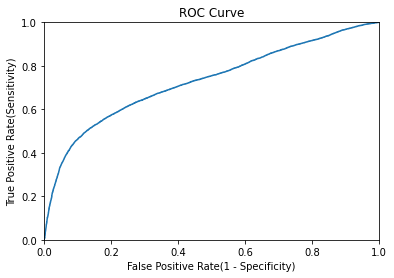

AUC :  0.7289539457260977


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = credit_data_feat['DEFAULT']
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)

plt.title('ROC Curve')
#Drawing ROC Curve
plt.plot(false_positive_rate, true_positive_rate)

#X and Y  Axis Limits 
plt.xlim([-0,1])
plt.ylim([-0,1])

# Labels 
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1 - Specificity)')
plt.show()

roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC : ', roc_auc)

## Threshold vs False Positive Rate (1 - Specificity)

Text(0.5, 0, 'False Positive Rate(1 - Specificity)')

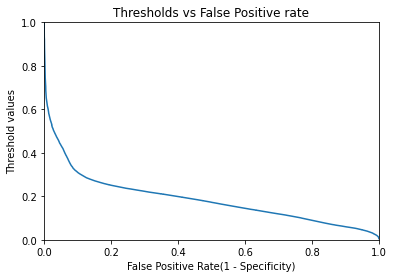

In [ ]:
plt.title('Thresholds vs False Positive rate')
plt.plot(false_positive_rate, thresholds)
plt.xlim([-0,1])
plt.ylim([-0,1])
plt.ylabel('Threshold values')
plt.xlabel('False Positive Rate(1 - Specificity)')

## Threshold variation

## Model Validation Parameters with Optimal Threshold

In [ ]:
# Converting predicted values into classes using new threshold
threshold=0.2
predicted_class=[ 0 if x < threshold else 1 for x in predictions]

# Updated Confusion matrix, Accuracy, sensitivity and specificity

cm = confusion_matrix(credit_data_feat['DEFAULT'], predicted_class)
print('Confusion Matrix : \n', cm)

total=sum(sum(cm))

accuracy=(cm[0,0]+cm[1,1])/total
print ('Accuracy : ', accuracy)

Confusion Matrix : 
 [[14092  9272]
 [ 1964  4672]]
Accuracy :  0.6254666666666666


## Model Validation Parameters

In [ ]:
# Sensitivity (Recall of Class 0)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity / Recall(0) : ', sensitivity )

# Precision of Class 0
precision_0 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Precision Class 0 : ', precision_0 )

# F1 Score of Class 0
F1_class0 = 2/((1/precision_0)+(1/sensitivity))
print('F1 Score of CLass 0 : ', F1_class0 )

# Specificity (Recall of Class 1)
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity / Recall(1) : ', specificity)

# Precision of Class 1
precision_1 = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision Class 1 : ', precision_1 )

# F1 Score of Class 1
F1_class1 = 2/((1/precision_1)+(1/specificity))
print('F1 Score of CLass 1 : ', F1_class1 )

Sensitivity / Recall(0) :  0.6031501455230269
Precision Class 0 :  0.8776781265570504
F1 Score of CLass 0 :  0.714967021816337
Specificity / Recall(1) :  0.7040385774562989
Precision Class 1 :  0.33505450372920254
F1 Score of CLass 1 :  0.4540330417881438


FINDINGS : At Threshold = 0.2 we are getting Specificity of 70%

# MODEL 3 : Decision Tree

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35493, 29)
(35493,)
(6000, 29)
(6000,)


In [ ]:
from sklearn import tree

dtree_model = tree.DecisionTreeClassifier(max_leaf_nodes = 112) # 112
dtree_model.fit(X_train,y_train)

train_acc= dtree_model.score(X_train,y_train)
print("train_accuracy", train_acc)

test_acc= dtree_model.score(X_test,y_test)
print("test_accuracy", test_acc)

print("Difference %", round((train_acc-test_acc)*100, 4))

train_accuracy 0.7603752852675175
test_accuracy 0.7441666666666666
Difference % 1.6209


Decision Tree with max_leaf_nodes = 112 gives accuracy  of 74.4%

In [ ]:
# Create confusion matrix

predict = dtree_model.predict(X_test)

cm = confusion_matrix(y_test, predict)
print('Confusion matrix : \n', cm)

Confusion matrix : 
 [[3679 1004]
 [ 531  786]]


## Model Validation Parameters

In [ ]:
# Sensitivity (Recall of Class 0)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity / Recall(0) : ', sensitivity )

# Precision of Class 0
precision_0 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Precision Class 0 : ', precision_0 )

# F1 Score of Class 0
F1_class0 = 2/((1/precision_0)+(1/sensitivity))
print('F1 Score of CLass 0 : ', F1_class0 )

# Specificity (Recall of Class 1)
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity / Recall(1) : ', specificity)

# Precision of Class 1
precision_1 = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision Class 1 : ', precision_1 )

# F1 Score of Class 1
F1_class1 = 2/((1/precision_1)+(1/specificity))
print('F1 Score of CLass 1 : ', F1_class1 )

Sensitivity / Recall(0) :  0.7856075165492206
Precision Class 0 :  0.8738717339667459
F1 Score of CLass 0 :  0.8273923310468908
Specificity / Recall(1) :  0.5968109339407744
Precision Class 1 :  0.43910614525139663
F1 Score of CLass 1 :  0.5059542967492758


Accuracy of Model 3 is 78.6% with a specificity of 59.7%

# MODEL 4 : Random Forest

In [ ]:
import scipy as sp
from sklearn.ensemble import RandomForestClassifier

# Build random forest model by selecting optimal values of hyper-parameters

forest=RandomForestClassifier(n_estimators=300, max_features=5, max_depth=10)
forest.fit(X_train,y_train)

# Predicting on train and test data
Forest_predict_train = forest.predict(X_train)
Forest_predict_test = forest.predict(X_test)

# Train Data Accuracy
cm1 = confusion_matrix(y_train, Forest_predict_train)
print("Confusion Matrix for Train data \n", cm1)

total1=sum(sum(cm1))
accuracy_tree_train=(cm1[0,0]+cm1[1,1])/total1
print("Accuracy of Train data \n", accuracy_tree_train)

# Test Data Accuracy
cm2 = confusion_matrix(y_test, Forest_predict_test)
print("Confusion Matrix for test data \n", cm2)

total2=sum(sum(cm2))
accuracy_tree_test=(cm2[0,0]+cm2[1,1])/total2
print("Accuracy of test data \n", accuracy_tree_test)

# Difference %
print("Difference %", round((accuracy_tree_train-accuracy_tree_test)*100, 2))

Confusion Matrix for Train data 
 [[16633  2048]
 [ 5035 11777]]
Accuracy of Train data 
 0.8004395232862818
Confusion Matrix for test data 
 [[4082  601]
 [ 596  721]]
Accuracy of test data 
 0.8005
Difference % -0.01


## Model Validation Parameters

In [ ]:
cm = cm2
print(cm)
# Sensitivity (Recall of Class 0)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity / Recall(0) : ', sensitivity )

# Precision of Class 0
precision_0 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Precision Class 0 : ', precision_0 )

# F1 Score of Class 0
F1_class0 = 2/((1/precision_0)+(1/sensitivity))
print('F1 Score of CLass 0 : ', F1_class0 )

# Specificity (Recall of Class 1)
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity / Recall(1) : ', specificity)

# Precision of Class 1
precision_1 = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision Class 1 : ', precision_1 )

# F1 Score of Class 1
F1_class1 = 2/((1/precision_1)+(1/specificity))
print('F1 Score of CLass 1 : ', F1_class1 )

[[4082  601]
 [ 596  721]]
Sensitivity / Recall(0) :  0.8716634635917148
Precision Class 0 :  0.8725951261222745
F1 Score of CLass 0 :  0.8721290460420896
Specificity / Recall(1) :  0.5474563401670464
Precision Class 1 :  0.5453857791225416
F1 Score of CLass 1 :  0.5464190981432361


Model 4 accuracy = 80% while specificity = 55%

# MODEL 5 : Gradient Boosting Method (GBM)


In [ ]:
from sklearn.metrics import f1_score
import time
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_boost=GradientBoostingClassifier(n_estimators=120,learning_rate=0.1, max_depth=5, verbose=1) 

## Fitting the gradient boost classifier
start_time = time.time()
gbm_boost.fit(X_train,y_train)
print("Time taken by GBM "+ str((time.time() - start_time))+ " Seconds")

      Iter       Train Loss   Remaining Time 
         1           1.3388           53.35s
         2           1.2993            1.03m
         3           1.2662            1.07m
         4           1.2387           56.82s
         5           1.2161           51.29s
         6           1.1956           47.66s
         7           1.1780           45.08s
         8           1.1626           42.93s
         9           1.1489           41.18s
        10           1.1377           39.76s
        20           1.0560           31.53s
        30           1.0094           27.17s
        40           0.9836           23.65s
        50           0.9587           20.43s
        60           0.9397           17.40s
        70           0.9233           14.42s
        80           0.9100           11.50s
        90           0.8977            8.62s
       100           0.8833            5.74s
Time taken by GBM 34.33855605125427 Seconds


## GBM Results 

In [ ]:
# Predicting Gradient Boosting Model on Train and Test data
gbm_predict_train = gbm_boost.predict(X_train)
gbm_predict_test = gbm_boost.predict(X_test)

# Train Data Validation
cm1 = confusion_matrix(y_train, gbm_predict_train)
print("Confusion Matrix for Train data \n", cm1)
total1=sum(sum(cm1))
accuracy_gbm_train=(cm1[0,0]+cm1[1,1])/total1

# Test Data Validation
cm2 = confusion_matrix(y_test, gbm_predict_test)
print("Confusion Matrix for test data \n", cm2)
total2=sum(sum(cm2))
accuracy_gbm_test=(cm2[0,0]+cm2[1,1])/total2

print("Accuracy on Train data = ", round(accuracy_gbm_train, 4))
print("Accuracy on  Test data = ", round(accuracy_gbm_test, 4))

# Difference %
print("Difference %", round((accuracy_gbm_train - accuracy_gbm_test)*100, 2))

Confusion Matrix for Train data 
 [[16481  2200]
 [ 4828 11984]]
Confusion Matrix for test data 
 [[4080  603]
 [ 608  709]]
Accuracy on Train data =  0.802
Accuracy on  Test data =  0.7982
Difference % 0.38


## Model Validation Parameters

In [ ]:
cm = cm2
print(cm)
# Sensitivity (Recall of Class 0)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity / Recall(0) : ', sensitivity )

# Precision of Class 0
precision_0 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Precision Class 0 : ', precision_0 )

# F1 Score of Class 0
F1_class0 = 2/((1/precision_0)+(1/sensitivity))
print('F1 Score of CLass 0 : ', F1_class0 )

# Specificity (Recall of Class 1)
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity / Recall(1) : ', specificity)

# Precision of Class 1
precision_1 = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision Class 1 : ', precision_1 )

# F1 Score of Class 1
F1_class1 = 2/((1/precision_1)+(1/specificity))
print('F1 Score of CLass 1 : ', F1_class1 )

[[4080  603]
 [ 608  709]]
Sensitivity / Recall(0) :  0.8712363869314542
Precision Class 0 :  0.8703071672354948
F1 Score of CLass 0 :  0.8707715291857859
Specificity / Recall(1) :  0.5383447228549735
Precision Class 1 :  0.5403963414634146
F1 Score of CLass 1 :  0.5393685812095854


Model 5 accuracy = 79.8% and Specificity = 53.8%

# MODEL 6 : XG Boost

In [ ]:
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn import preprocessing

# Creating XGB Friendly data and matrices

train_labels = y_train.values
test_labels = y_test.values
full_labels = y.values

matrix_train = xgboost.DMatrix(X_train, label=train_labels)
matrix_test = xgboost.DMatrix(X_test, label=test_labels)

In [ ]:
params = {
    'max_depth': 7, 
    'eta':0.195, # Learning Rate
    'eval_metric':'merror', # Multiclass classification error rate. 
#   'tree_method' : "gpu_hist", # use this with colab in gpu mode for faster training
    'num_class': 2
}

start_time = time.time()

model=xgboost.train(params=params,
                    dtrain=matrix_train,
                    num_boost_round=1000,    #Number of trees
                    early_stopping_rounds=4, # Stop after 4 rounds, if test error doesn't improve. 
                    evals=[(matrix_test,'test')] 
                   )

print("Time taken by XGB "+ str((time.time() - start_time))+ " Seconds")

[0]	test-merror:0.245167
Will train until test-merror hasn't improved in 4 rounds.
[1]	test-merror:0.216333
[2]	test-merror:0.214333
[3]	test-merror:0.2125
[4]	test-merror:0.208167
[5]	test-merror:0.2085
[6]	test-merror:0.2105
[7]	test-merror:0.208
[8]	test-merror:0.205833
[9]	test-merror:0.205667
[10]	test-merror:0.205333
[11]	test-merror:0.2045
[12]	test-merror:0.204167
[13]	test-merror:0.205333
[14]	test-merror:0.203667
[15]	test-merror:0.204333
[16]	test-merror:0.205333
[17]	test-merror:0.206333
[18]	test-merror:0.205167
Stopping. Best iteration:
[14]	test-merror:0.203667

Time taken by XGB 3.768723964691162 Seconds


## XGB results

In [ ]:
### Prediction using XGB on the train Data
boost_predict_train=model.predict(matrix_train)
cm1 = confusion_matrix(train_labels,boost_predict_train)
print(cm1)

accuracy_train=f1_score(train_labels, boost_predict_train, average='micro') 
print("train accuracy", round(accuracy_train, 4))

### Prediction using XGB on the test Data
boost_predict_test=model.predict(matrix_test)
cm2 = confusion_matrix(test_labels,boost_predict_test)
print(cm2)

accuracy_test=f1_score(test_labels, boost_predict_test, average='micro') 
print("test accuracy", round(accuracy_test, 4))

# Difference %
print("Difference %", round((accuracy_train - accuracy_test)*100, 2))

[[16616  2065]
 [ 4829 11983]]
train accuracy 0.8058
[[4069  614]
 [ 617  700]]
test accuracy 0.7948
Difference % 1.09


## Model Validation Parameters

In [ ]:
cm = cm2
print(cm)
# Sensitivity (Recall of Class 0)
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity / Recall(0) : ', sensitivity )

# Precision of Class 0
precision_0 = cm[0,0]/(cm[0,0]+cm[1,0])
print('Precision Class 0 : ', precision_0 )

# F1 Score of Class 0
F1_class0 = 2/((1/precision_0)+(1/sensitivity))
print('F1 Score of CLass 0 : ', F1_class0 )

# Specificity (Recall of Class 1)
specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity / Recall(1) : ', specificity)

# Precision of Class 1
precision_1 = cm[1,1]/(cm[0,1]+cm[1,1])
print('Precision Class 1 : ', precision_1 )

# F1 Score of Class 1
F1_class1 = 2/((1/precision_1)+(1/specificity))
print('F1 Score of CLass 1 : ', F1_class1 )

[[4069  614]
 [ 617  700]]
Sensitivity / Recall(0) :  0.8688874653000214
Precision Class 0 :  0.8683311993171148
F1 Score of CLass 0 :  0.8686092432490128
Specificity / Recall(1) :  0.5315110098709187
Precision Class 1 :  0.532724505327245
F1 Score of CLass 1 :  0.5321170657544659


Model 6 Accuracy = 79.5% with Specificity = 53.2%

# FINAL RESULT

In this problem statement, variable importance will be factored in as the bank will have to highlight the parameters based on which a person has been termed as a defaulter.

FIRST CHOICE : 

So, the first choice would be Model 3 - Decision Tree. Good Accuracy with decent specificity.

SECOND CHOICE :

And, if the overall accuracy is also important then we can go for Model 4 - Random Forest. Random Forest can also show variable importance by following certain methods

THIRD CHOICE :

If class accuracy matters a lot, then we can go for Model 2 - Logistic regression with threshold = 0.2. It has the highest specificity among all models.


### Model Comparisons


|Model no	|Model Description				|Accuracy	|Sensitivity	|F1 score 0	|Specificity	|F1 score 1	|ROC AUC|
|:----------|:------------------------------|:----------|:--------------|:----------|:--------------|:----------|:------|
|1			|Logistic Regression			|60.6		|59.1			|70.0		|65.6			|42.2       |       |
|2			|Logistic Reg. threshold = 0.2	|62.5		|60.3		    |71.5       |70.4           |45.4       |0.73   |
|3			|Decision Tree					|74.4		|78.5		    |82.7       |59.7           |50.6       |       |
|4			|Random Forest					|80.0		|87.1			|87.2		|54.7 			|54.6		|		|
|5			|Gradient Boosting Machine		|79.8		|87.1			|87.1		|53.8			|53.9	    |       |
|6			|XG Boosting					|79.5		|86.9			|86.9		|53.2			|53.2	    |       |


------------------